What if instead of trying faces etc etc we just 

found the center of the screen 

found the nearst number (contur)

found the nearst number to that number (conuturs again)

checked if they lined up if they did its a two diget number <br/>
---- lined up here means somthing need to be done by taking both conturs rotating each of them so that they have the thinist bounding box (that one of the dimensions is minimesed) if they both are rotated roughly the same amount to do this then they line up if it dosent work then it dosent

if they dont its a one digit number nad the one closest to the screen is the number

lazy but if it works thats a techincal working program

# step 0 take in the image
not going to be nessary in when this is moved over to main program

In [90]:
%matplotlib inline

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plt # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui
import copy
from math import sqrt
from math import acos
import math
debug = 1 #set to 1 to see each step set to 0 to run fast

In [103]:
fileName = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])

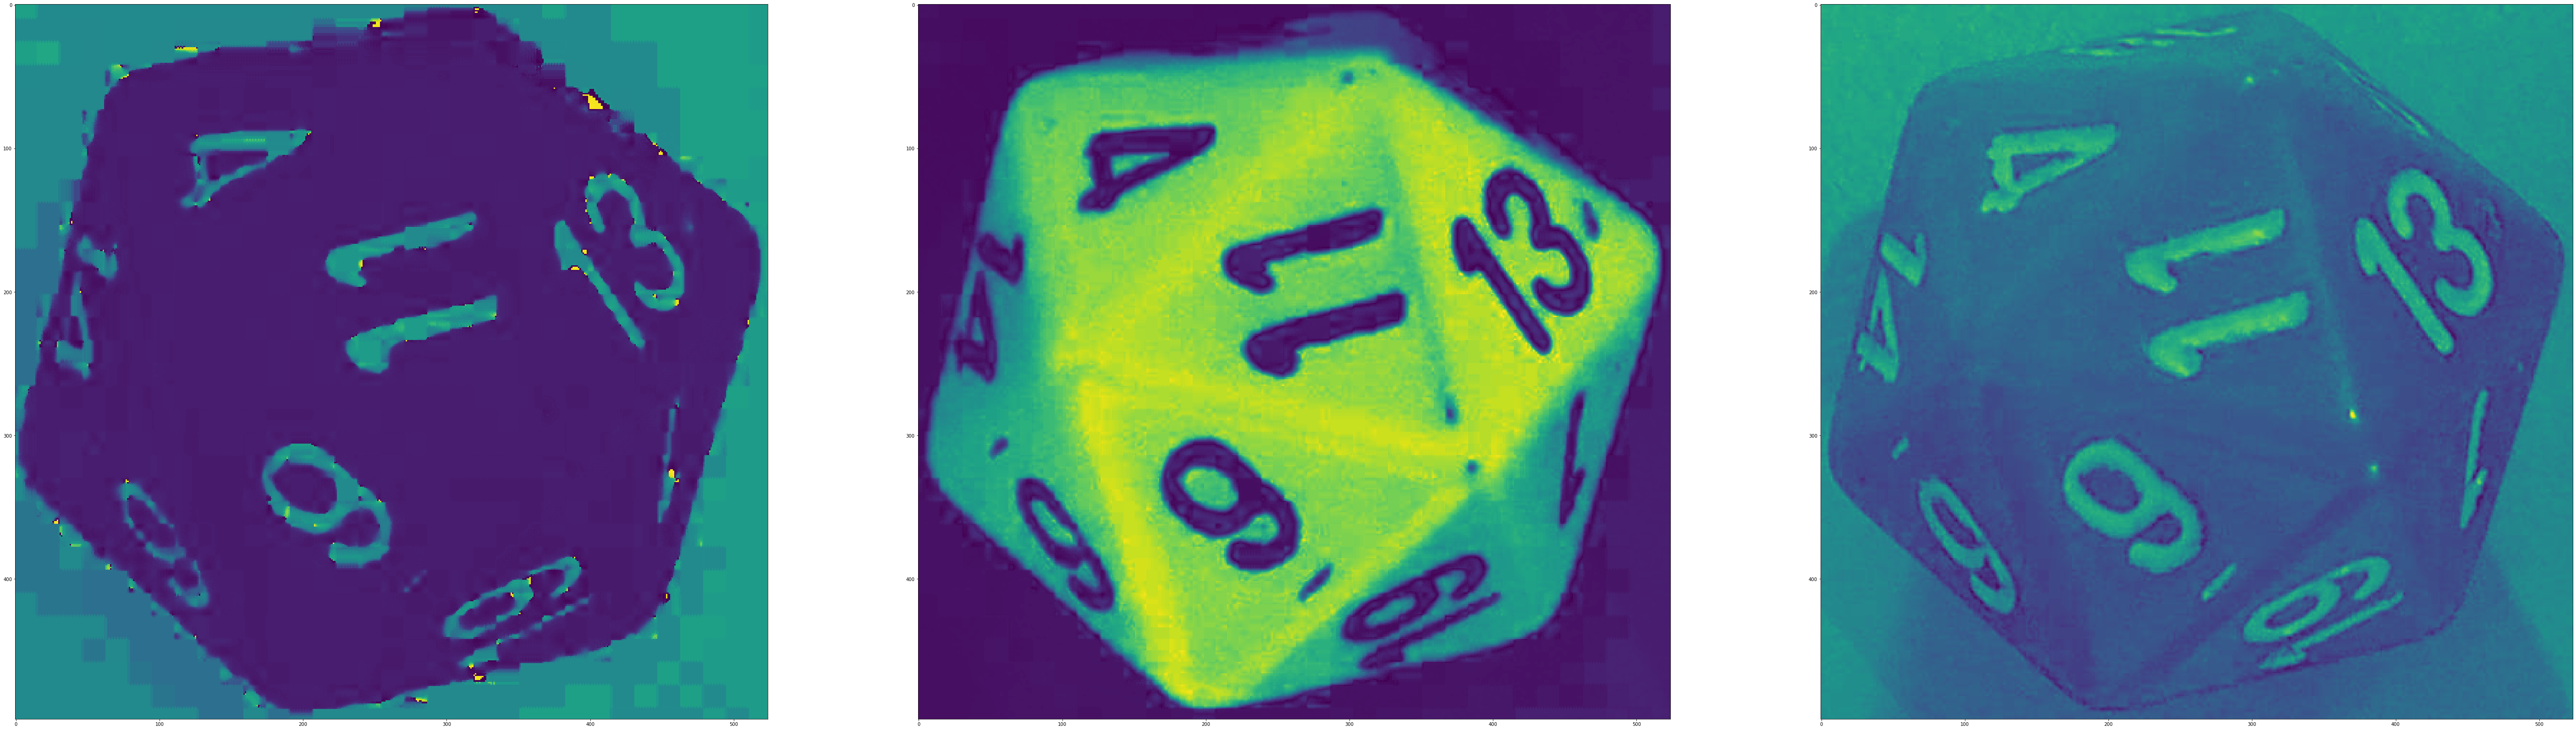

In [104]:
dieRaw = cv2.imread(fileName,cv2.IMREAD_COLOR)
dieRaw = cv2.cvtColor(dieRaw,cv2.COLOR_RGB2BGR)
dieHSV = cv2.cvtColor(dieRaw,cv2.COLOR_BGR2HSV)
dieGreyH,dieGreyS,dieGreyV = cv2.split(dieHSV)

void = 0
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.subplot(1,3,1),plt.imshow(dieGreyH)
    plt.subplot(1,3,2),plt.imshow(dieGreyS)
    plt.subplot(1,3,3),plt.imshow(dieGreyV)

# step 1 find the center of the screen

In [105]:
def displayCenterOfImage(image):#purely for debuing help
    h, w = image.shape
    print()
    midY, midX = h/2, w/2
    imageCopy = copy.deepcopy(image)
    imageCopy = cv2.cvtColor(imageCopy,cv2.COLOR_GRAY2BGR)
    cv2.circle(img = imageCopy,center = (int(midY), int(midX)),radius =5, color = (0,0,255), thickness = -1)
    plt.imshow(imageCopy)
    
def distBettweenPoints(x1,y1,x2,y2):
    distance = ((x1 - x2)**2 + (y1 - y2)**2)**0.5
    return distance

In [106]:
#h, w = dieGray.shape
#midY, midX = h/2, w/2
#displayCenterOfImage(dieGray)
#dieGrayEqual = cv2.equalizeHist(dieGray)
    
h, w = dieGreyH.shape
print(h, w)

498 524


# step 2 find the two nearest conturs to the center

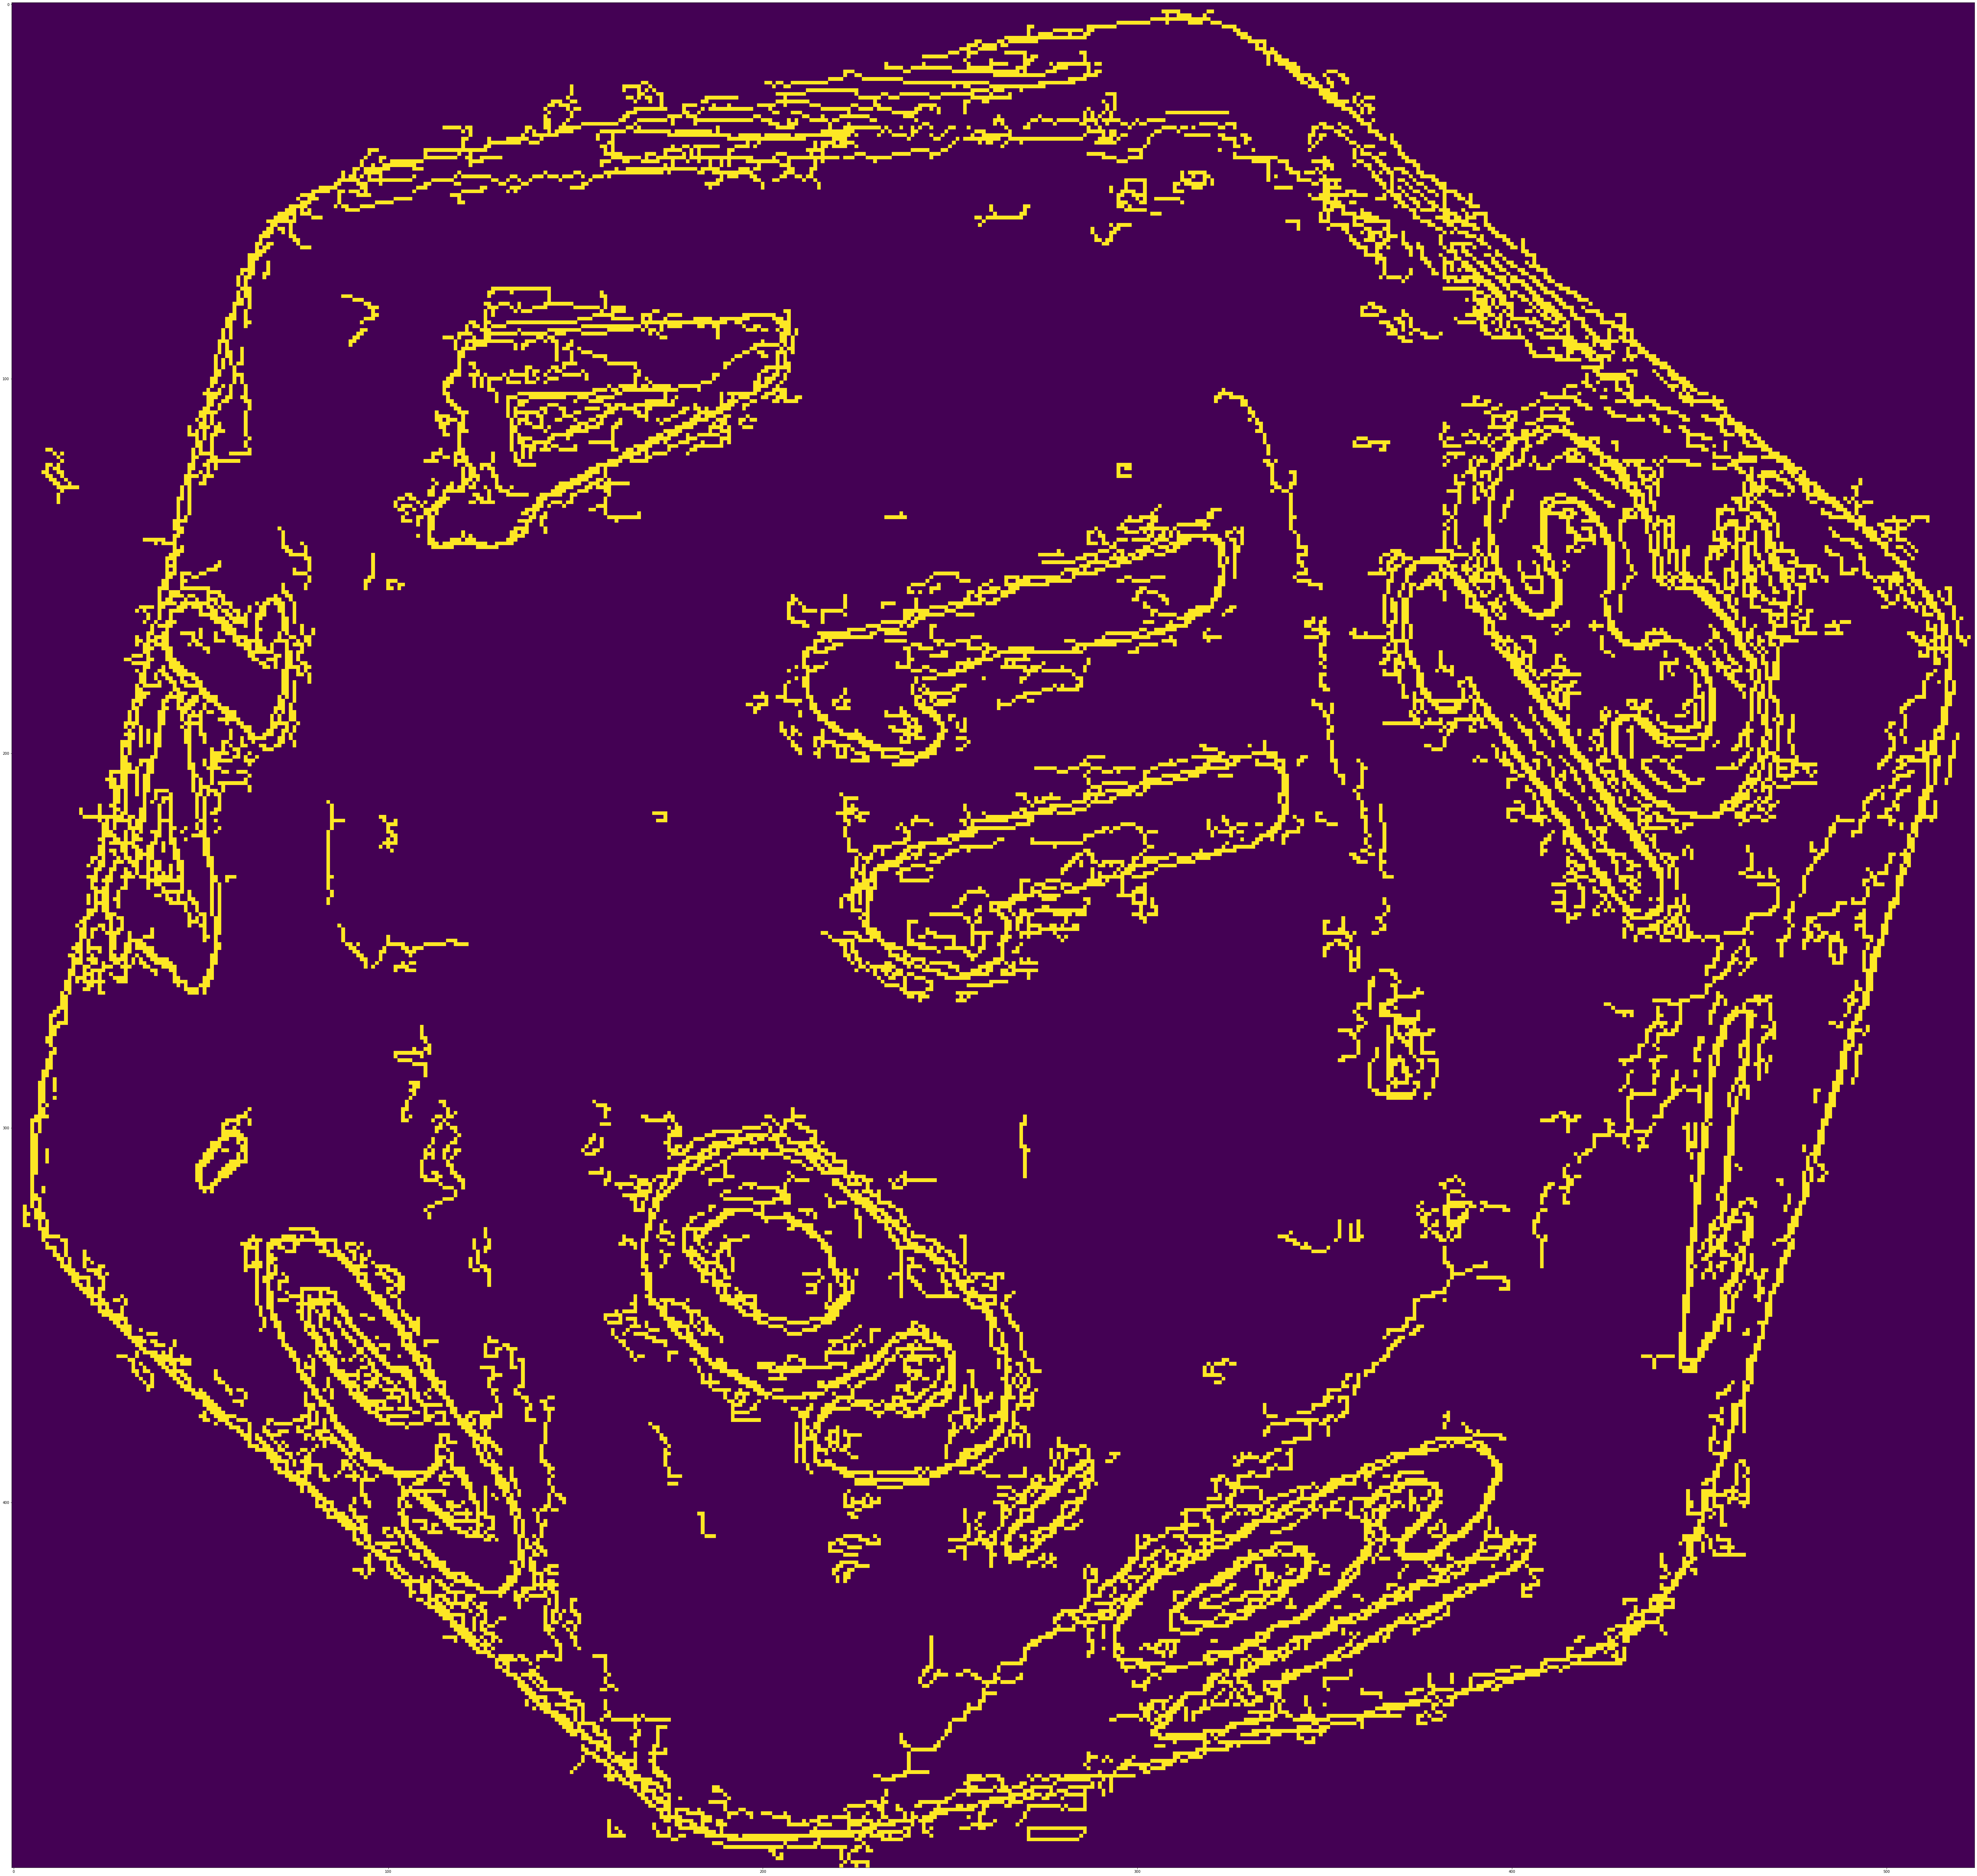

In [107]:
#MAGIC threshoulding stuff
#thresholdConsant = (np.mean(dieGray) + np.std(dieGray))/25
#threshholdedDieGray = cv2.adaptiveThreshold(dieGray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 501,thresholdConsant)
#dieBlured = cv2.medianBlur(dieGray, 9)
cannyedS = cv2.Canny(dieGreyS,50,110)
cannyedV = cv2.Canny(dieGreyV,25,90)
cannyed = cv2.bitwise_or(cannyedV, cannyedS)
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(cannyed)

 clean up

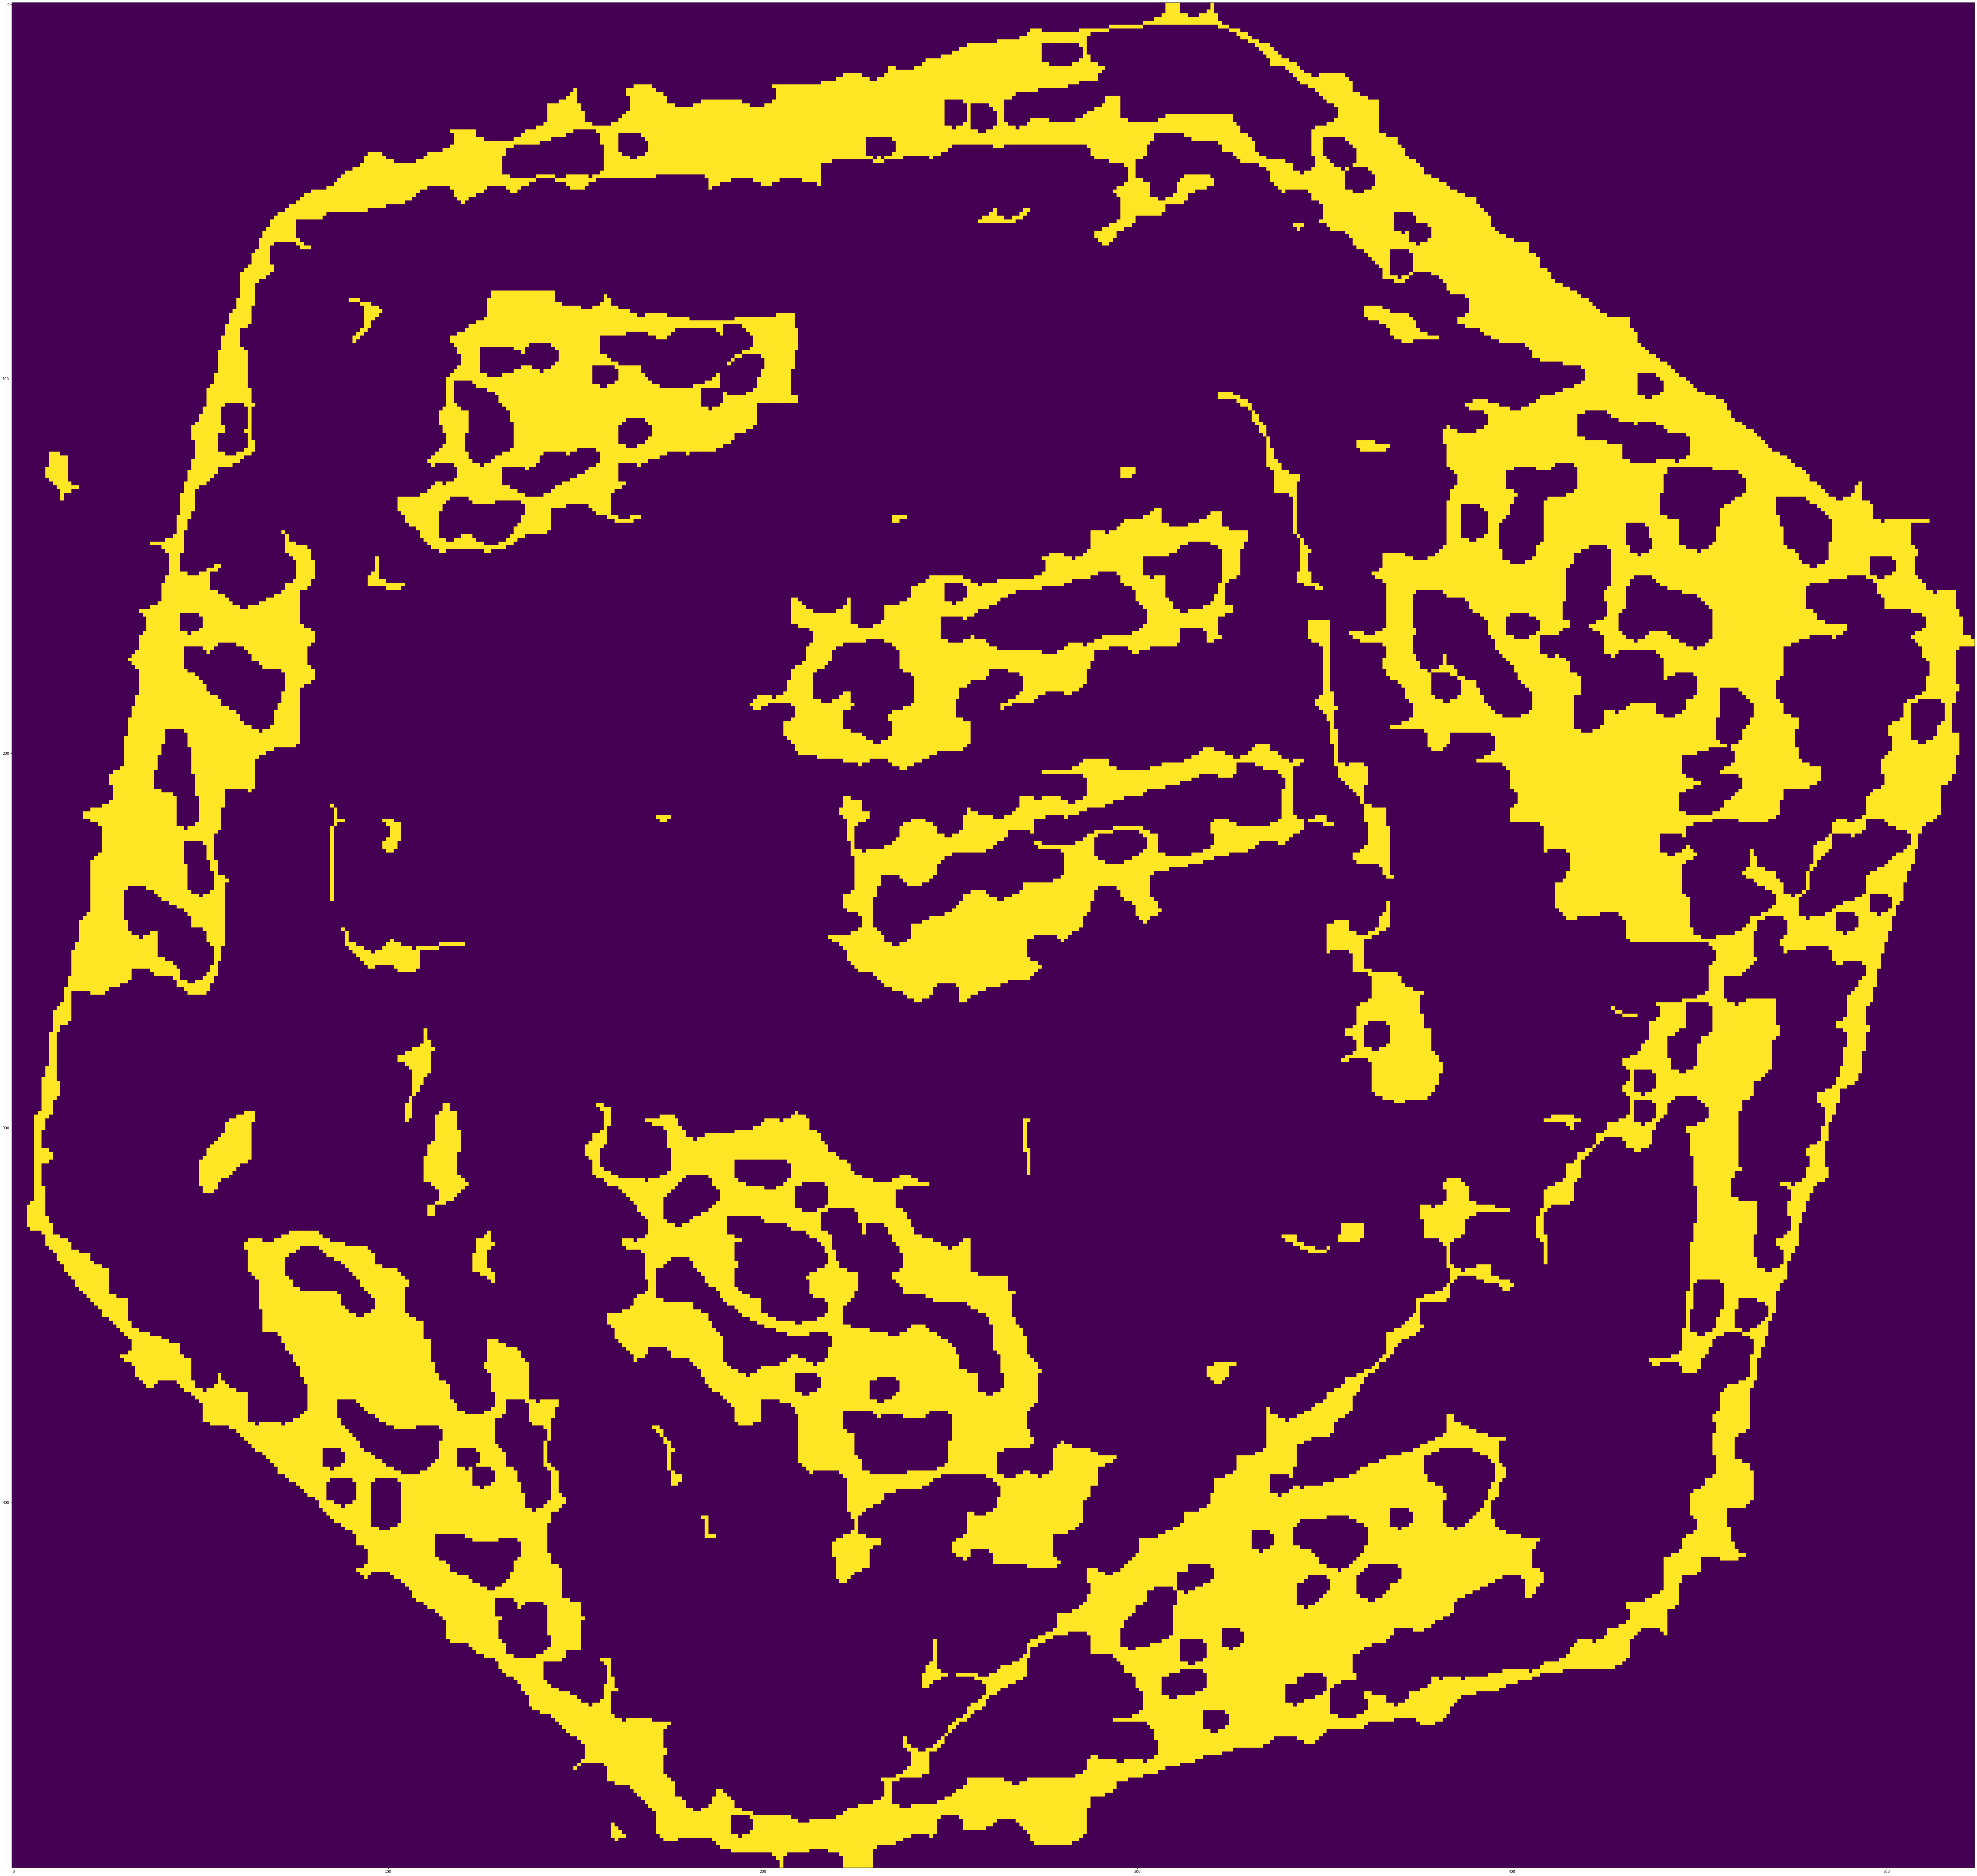

In [108]:
#MAGIC - how do we know what size the tiding up stuff should be?
def circle(diamter):
    return cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(diamter,diamter))
#making this genralised is really hard
circleSize = 6

diceMask = cv2.dilate(cannyed,circle(circleSize))
diceMask = cv2.erode(diceMask,circle(circleSize))

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)

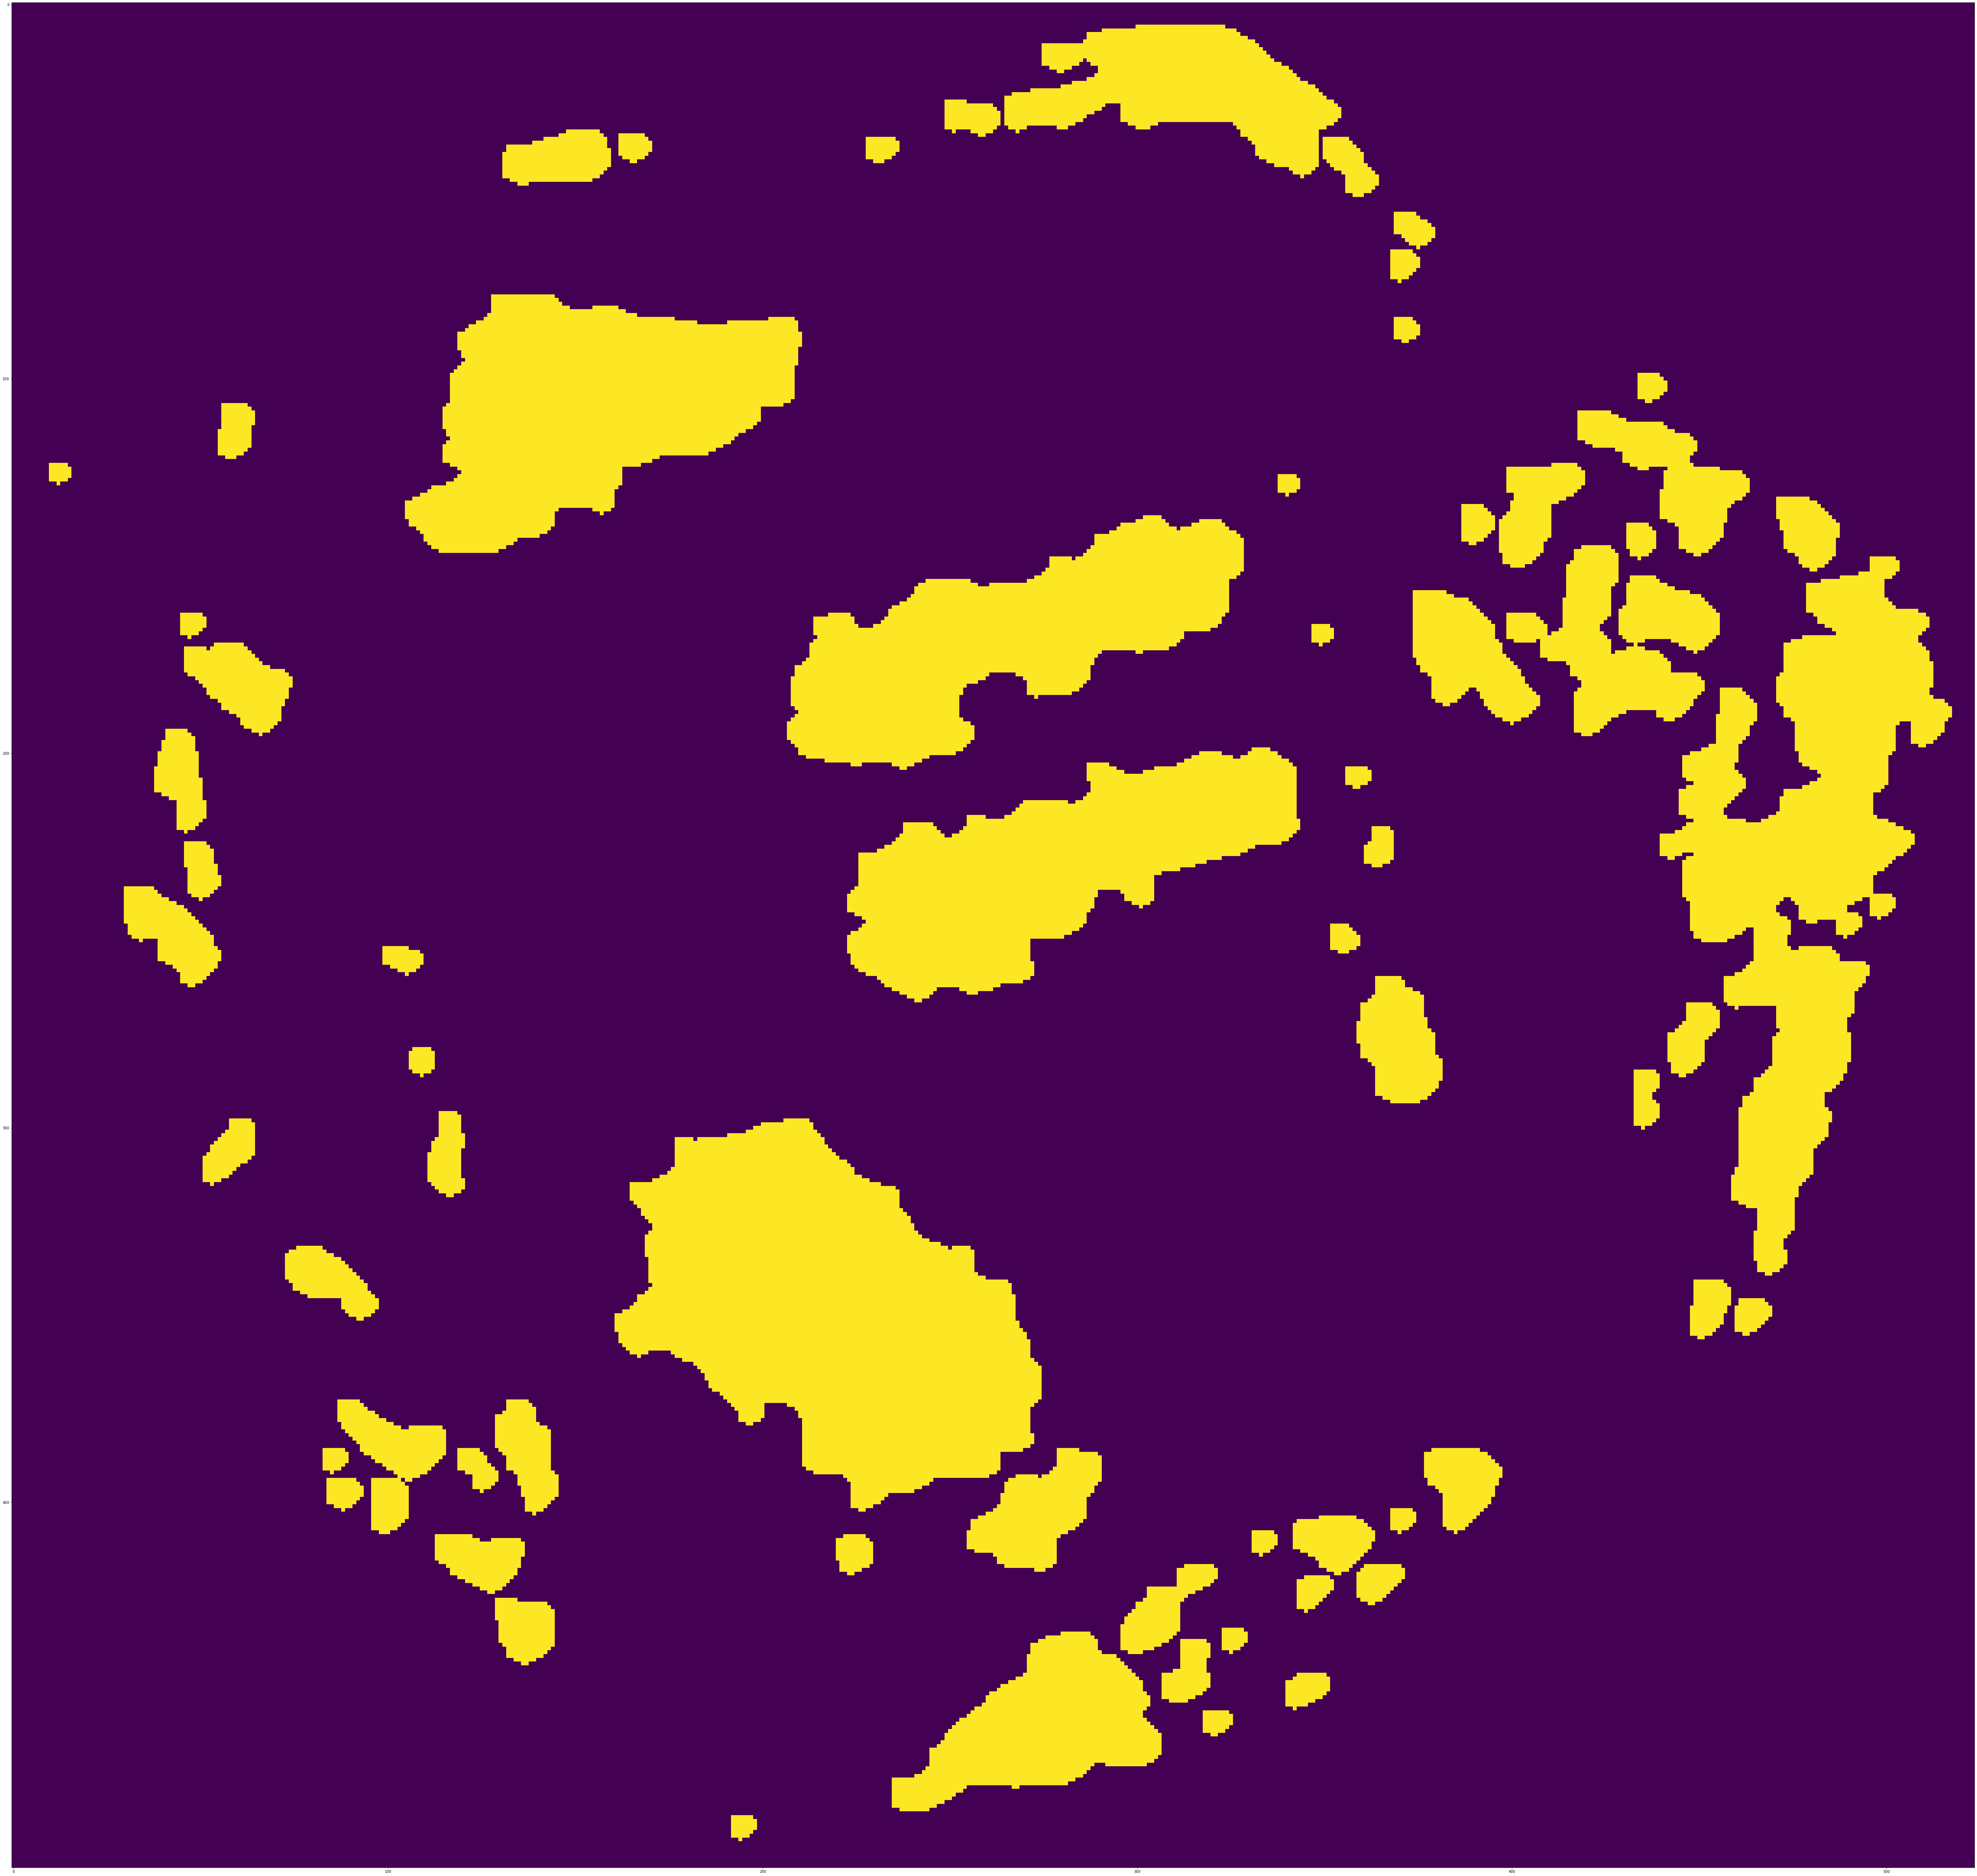

In [109]:
#if debug == 1:
#    plt.figure(figsize=(100,100))
#    plt.imshow(diceMask)
contours, hierarchy = cv2.findContours(diceMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#if debug == 1:
    #print(contours)
    #print(hierarchy)
h, w = diceMask.shape
sizeOfImage = h*w
contoursWithoutDice = []
for contour in contours:
    #print(cv2.boundingRdw  ect(contour))
    #print("cv2.boundingRect(contour)[2]:",cv2.boundingRect(contour)[2],"cv2.boundingRect(contour)[3]",cv2.boundingRect(contour)[3],"*:",cv2.boundingRect(contour)[2]*cv2.boundingRect(contour)[3],"sizeOfImage/2:",sizeOfImage*0.9)
    
    if (cv2.boundingRect(contour)[2]*cv2.boundingRect(contour)[3] < sizeOfImage*0.5):
        contoursWithoutDice.append(contour)
        #print("added")
    #else:
    #    print("not added")
diceMask = np.zeros(shape=diceMask.shape, dtype=np.uint8)
cv2.fillPoly(diceMask,pts=contoursWithoutDice,color=(255))
#diceMask = cv2.erode(diceMask,circle(circleSize))
#diceMask = cv2.dilate(diceMask,circle(circleSize))

contoursWithoutDice, hierarchy = cv2.findContours(diceMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(diceMask,contoursWithoutDice,-1,255,thickness=cv2.FILLED)

circleSize = 6

diceMask = cv2.erode(diceMask,circle(circleSize))
diceMask = cv2.dilate(diceMask,circle(circleSize))

contoursWithoutDice, hierarchy = cv2.findContours(diceMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(diceMask)    

https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

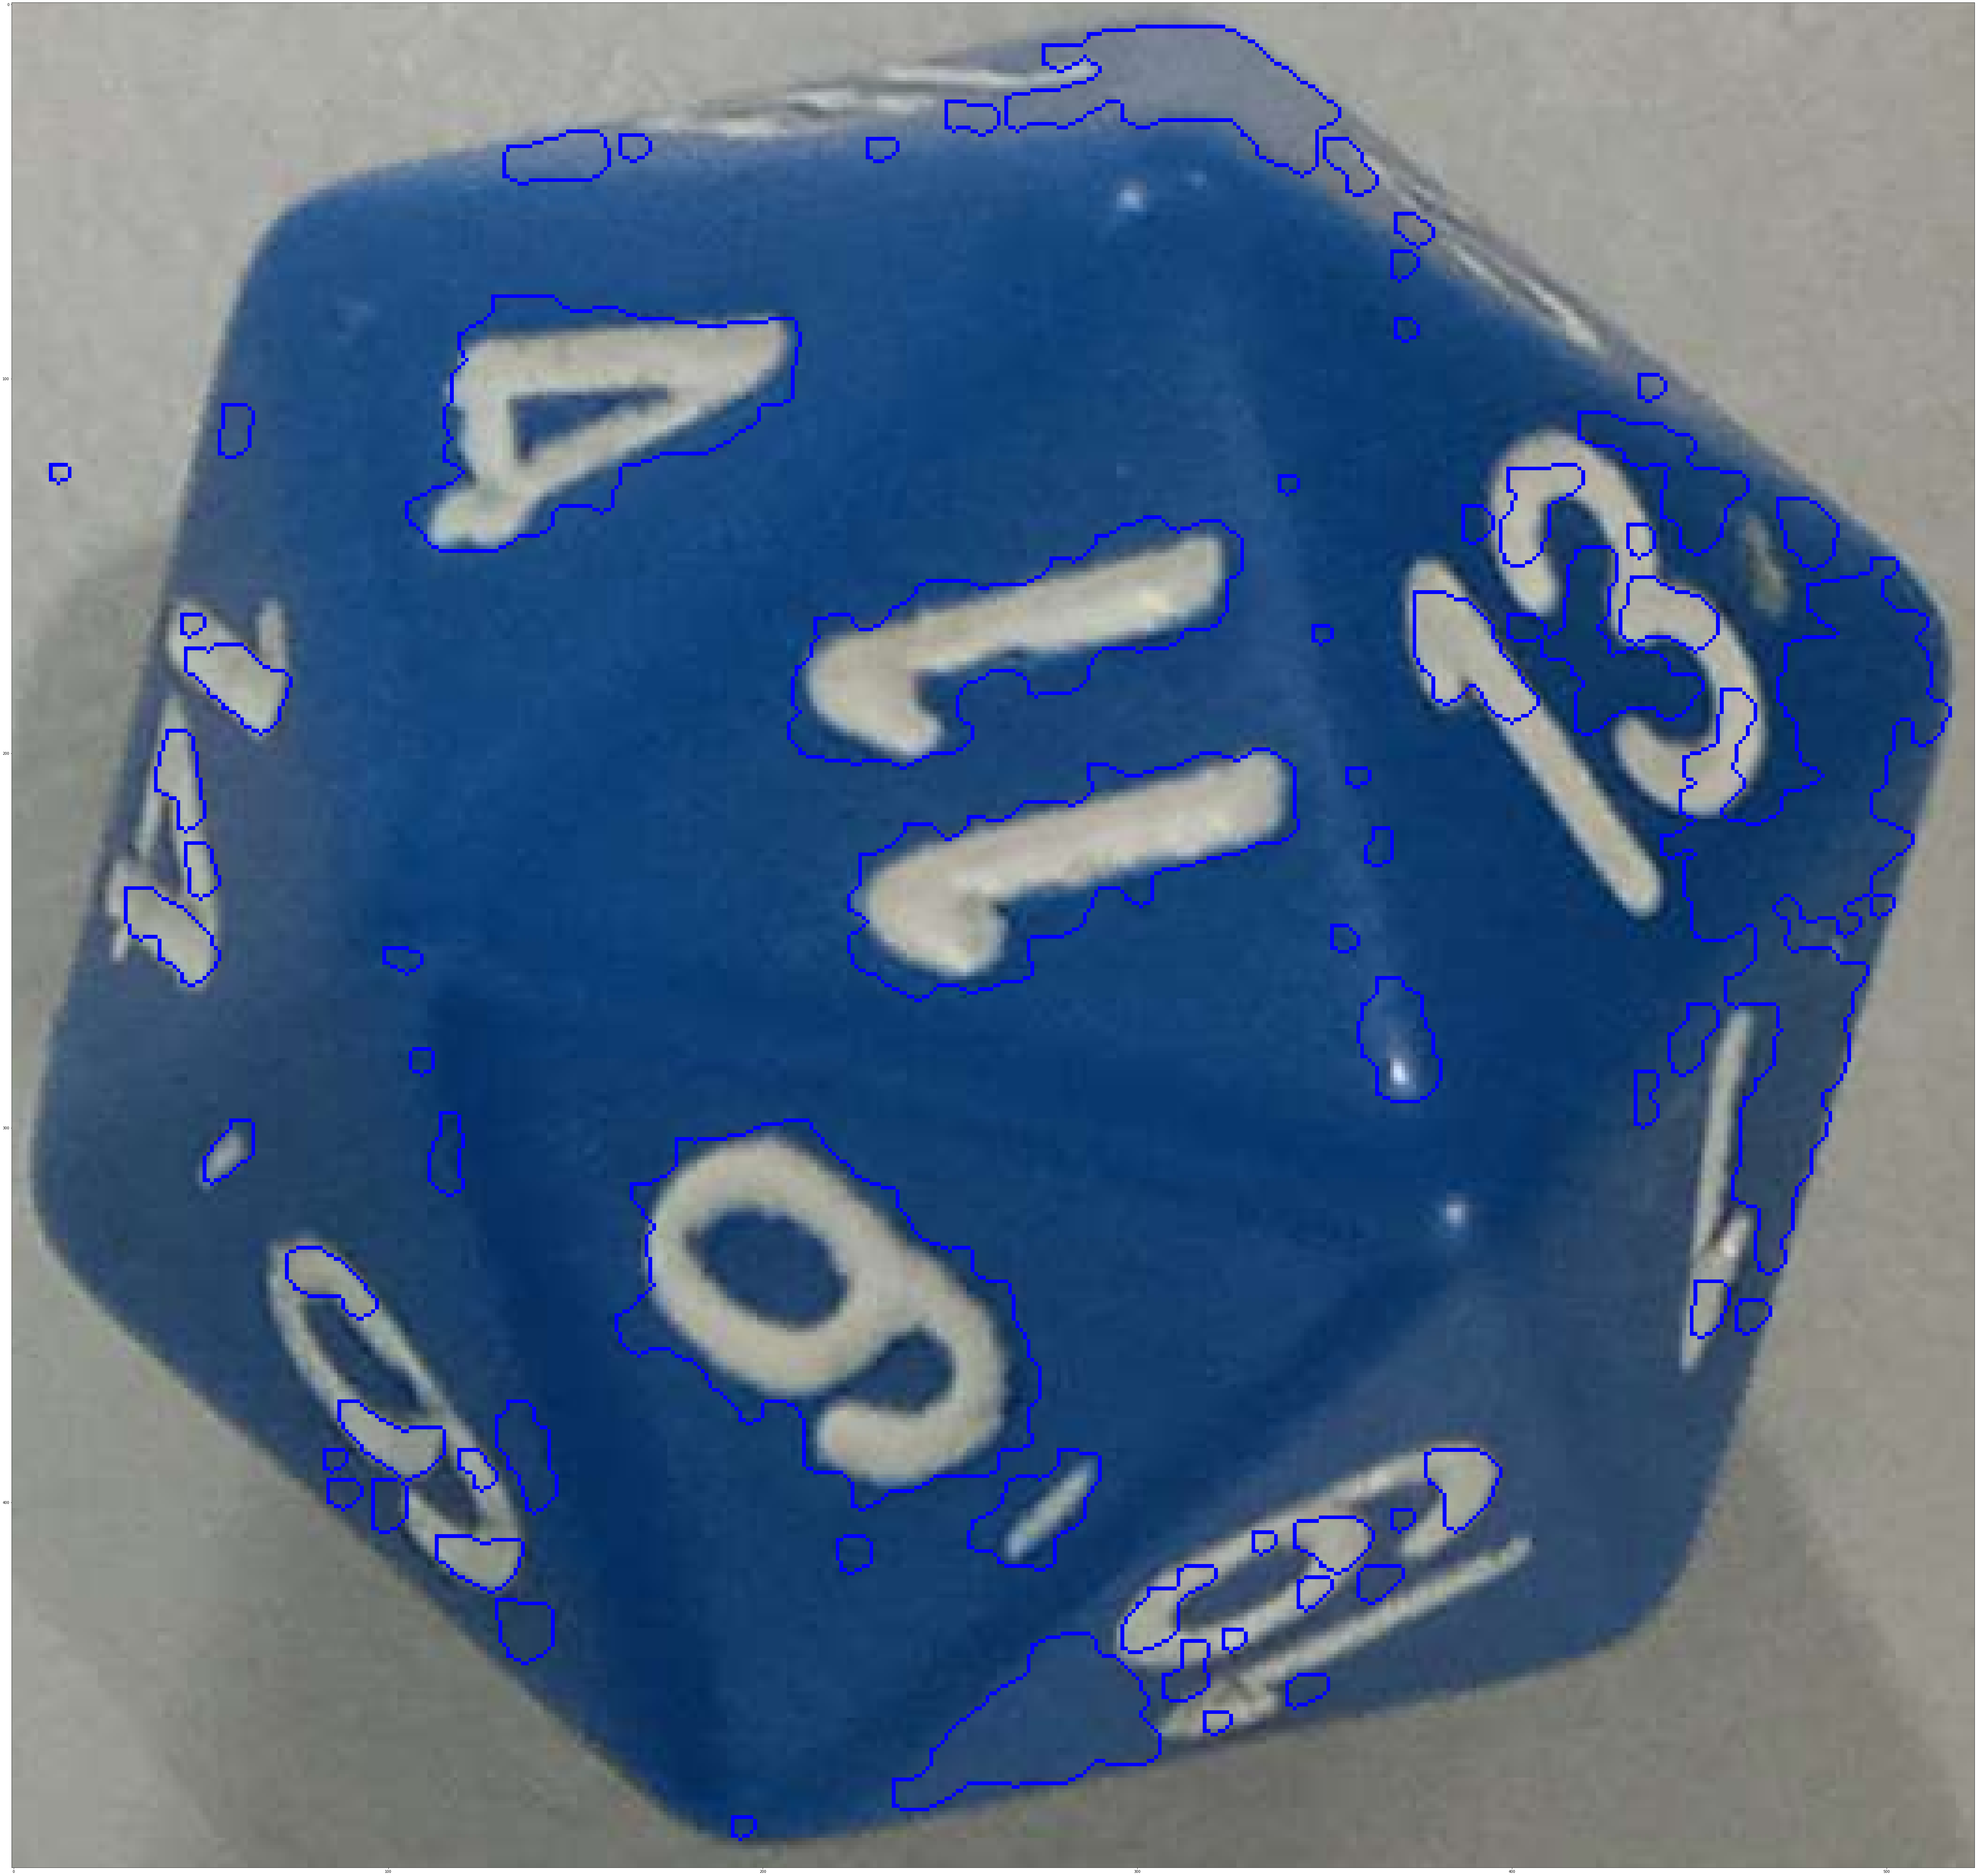

In [110]:
if debug == 1:
    dieRawTemp = copy.deepcopy(dieRaw)
    cv2.drawContours(dieRawTemp,contoursWithoutDice,-1,(0,0,255),1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [111]:
h, w = diceMask.shape
midY, midX = h/2, w/2
closestContur = 0
distance = h+w #always way bigger than anyother possible distance
for contur in contoursWithoutDice:
    for cords in contur:
        print("cords:")
        print(cords)
        x,y = cords[0]
        if distBettweenPoints(x,y,midX,midY) < distance:
            closestContur = contur
            distance = distBettweenPoints(x,y,midX,midY)
            if debug == 1:
                print("distance is now:")
                print(distance)

cords:
[[192 484]]
distance is now:
245.20399670478457
cords:
[[192 489]]
cords:
[[193 489]]
cords:
[[194 490]]
cords:
[[195 489]]
cords:
[[196 489]]
cords:
[[198 487]]
cords:
[[198 485]]
distance is now:
244.5240274492468
cords:
[[197 484]]
distance is now:
243.82370680473218
cords:
[[318 456]]
distance is now:
214.44113411377026
cords:
[[318 461]]
cords:
[[319 461]]
cords:
[[320 462]]
cords:
[[321 462]]
cords:
[[322 461]]
cords:
[[323 461]]
cords:
[[325 459]]
cords:
[[325 457]]
cords:
[[324 456]]
cords:
[[343 446]]
distance is now:
213.00234740490538
cords:
[[341 448]]
cords:
[[340 448]]
cords:
[[340 454]]
cords:
[[341 454]]
cords:
[[342 455]]
cords:
[[343 454]]
cords:
[[345 454]]
cords:
[[346 453]]
cords:
[[347 453]]
cords:
[[348 452]]
cords:
[[349 452]]
cords:
[[351 450]]
cords:
[[351 447]]
cords:
[[350 446]]
cords:
[[312 437]]
distance is now:
194.53534383242547
cords:
[[312 444]]
cords:
[[311 445]]
cords:
[[310 445]]
cords:
[[309 446]]
cords:
[[307 446]]
cords:
[[307 452]]
cords:

cords:
[[456 352]]
cords:
[[456 350]]
cords:
[[457 349]]
cords:
[[457 348]]
cords:
[[458 347]]
cords:
[[458 343]]
cords:
[[456 341]]
cords:
[[ 76 332]]
cords:
[[ 75 333]]
cords:
[[ 74 333]]
cords:
[[ 73 334]]
cords:
[[ 73 340]]
cords:
[[ 75 342]]
cords:
[[ 75 343]]
cords:
[[ 76 343]]
cords:
[[ 77 344]]
cords:
[[ 78 344]]
cords:
[[ 79 345]]
cords:
[[ 87 345]]
cords:
[[ 88 346]]
cords:
[[ 88 348]]
cords:
[[ 90 350]]
cords:
[[ 91 350]]
cords:
[[ 92 351]]
cords:
[[ 93 351]]
cords:
[[ 94 350]]
cords:
[[ 95 350]]
cords:
[[ 97 348]]
cords:
[[ 97 346]]
cords:
[[ 94 343]]
cords:
[[ 94 342]]
cords:
[[ 87 335]]
cords:
[[ 86 335]]
cords:
[[ 85 334]]
cords:
[[ 84 334]]
cords:
[[ 82 332]]
cords:
[[206 298]]
distance is now:
74.41102068914255
cords:
[[205 299]]
cords:
[[200 299]]
cords:
[[199 300]]
cords:
[[198 300]]
cords:
[[197 301]]
cords:
[[196 301]]
cords:
[[195 302]]
cords:
[[191 302]]
cords:
[[190 303]]
cords:
[[183 303]]
cords:
[[182 304]]
cords:
[[181 303]]
cords:
[[177 303]]
cords:
[[177 31

cords:
[[270 213]]
distance is now:
36.87817782917155
cords:
[[266 217]]
distance is now:
32.2490309931942
cords:
[[265 217]]
distance is now:
32.14031735997639
cords:
[[264 218]]
distance is now:
31.064449134018133
cords:
[[260 218]]
cords:
[[259 217]]
cords:
[[255 217]]
cords:
[[255 219]]
distance is now:
30.805843601498726
cords:
[[252 222]]
distance is now:
28.792360097775937
cords:
[[251 222]]
cords:
[[250 223]]
distance is now:
28.635642126552707
cords:
[[249 223]]
cords:
[[245 219]]
cords:
[[238 219]]
cords:
[[238 221]]
cords:
[[234 225]]
cords:
[[233 225]]
cords:
[[232 226]]
cords:
[[231 226]]
cords:
[[230 227]]
cords:
[[226 227]]
cords:
[[226 235]]
cords:
[[223 238]]
cords:
[[223 242]]
cords:
[[224 242]]
cords:
[[225 243]]
cords:
[[226 243]]
cords:
[[228 245]]
cords:
[[225 248]]
cords:
[[224 248]]
cords:
[[223 249]]
cords:
[[223 253]]
cords:
[[224 254]]
cords:
[[224 256]]
cords:
[[226 258]]
cords:
[[227 258]]
cords:
[[228 259]]
cords:
[[230 259]]
cords:
[[233 262]]
cords:
[[23

[[481 245]]
cords:
[[482 244]]
cords:
[[486 244]]
cords:
[[487 245]]
cords:
[[487 248]]
cords:
[[488 248]]
cords:
[[489 249]]
cords:
[[490 248]]
cords:
[[491 248]]
cords:
[[493 246]]
cords:
[[493 244]]
cords:
[[492 243]]
cords:
[[490 243]]
cords:
[[489 242]]
cords:
[[489 241]]
cords:
[[490 240]]
cords:
[[491 240]]
cords:
[[492 239]]
cords:
[[493 239]]
cords:
[[494 238]]
cords:
[[495 238]]
cords:
[[496 239]]
cords:
[[496 243]]
cords:
[[497 243]]
cords:
[[498 244]]
cords:
[[499 243]]
cords:
[[500 243]]
cords:
[[502 241]]
cords:
[[502 239]]
cords:
[[501 238]]
cords:
[[497 238]]
cords:
[[496 237]]
cords:
[[496 233]]
cords:
[[498 231]]
cords:
[[499 231]]
cords:
[[503 227]]
cords:
[[504 227]]
cords:
[[507 224]]
cords:
[[507 222]]
cords:
[[506 221]]
cords:
[[505 221]]
cords:
[[504 220]]
cords:
[[503 220]]
cords:
[[502 219]]
cords:
[[501 219]]
cords:
[[500 218]]
cords:
[[498 218]]
cords:
[[496 216]]
cords:
[[496 211]]
cords:
[[497 210]]
cords:
[[498 210]]
cords:
[[500 208]]
cords:
[[500 201]]


[[428 110]]
cords:
[[427 110]]
cords:
[[426 109]]
cords:
[[ 56 107]]
cords:
[[ 56 113]]
cords:
[[ 55 114]]
cords:
[[ 55 120]]
cords:
[[ 56 120]]
cords:
[[ 57 121]]
cords:
[[ 59 121]]
cords:
[[ 60 120]]
cords:
[[ 61 120]]
cords:
[[ 63 118]]
cords:
[[ 63 113]]
cords:
[[ 64 112]]
cords:
[[ 64 109]]
cords:
[[ 62 107]]
cords:
[[434  99]]
cords:
[[434 105]]
cords:
[[435 105]]
cords:
[[436 106]]
cords:
[[437 106]]
cords:
[[438 105]]
cords:
[[439 105]]
cords:
[[441 103]]
cords:
[[441 101]]
cords:
[[439  99]]
cords:
[[369  84]]
cords:
[[369  89]]
cords:
[[370  89]]
cords:
[[371  90]]
cords:
[[372  90]]
cords:
[[373  89]]
cords:
[[374  89]]
cords:
[[375  88]]
cords:
[[375  86]]
cords:
[[373  84]]
cords:
[[128  78]]
cords:
[[128  82]]
cords:
[[125  85]]
cords:
[[124  85]]
cords:
[[123  86]]
cords:
[[122  86]]
cords:
[[120  88]]
cords:
[[119  88]]
cords:
[[119  92]]
cords:
[[120  93]]
cords:
[[120  94]]
cords:
[[121  95]]
cords:
[[117  99]]
cords:
[[117 106]]
cords:
[[115 108]]
cords:
[[115 113]]


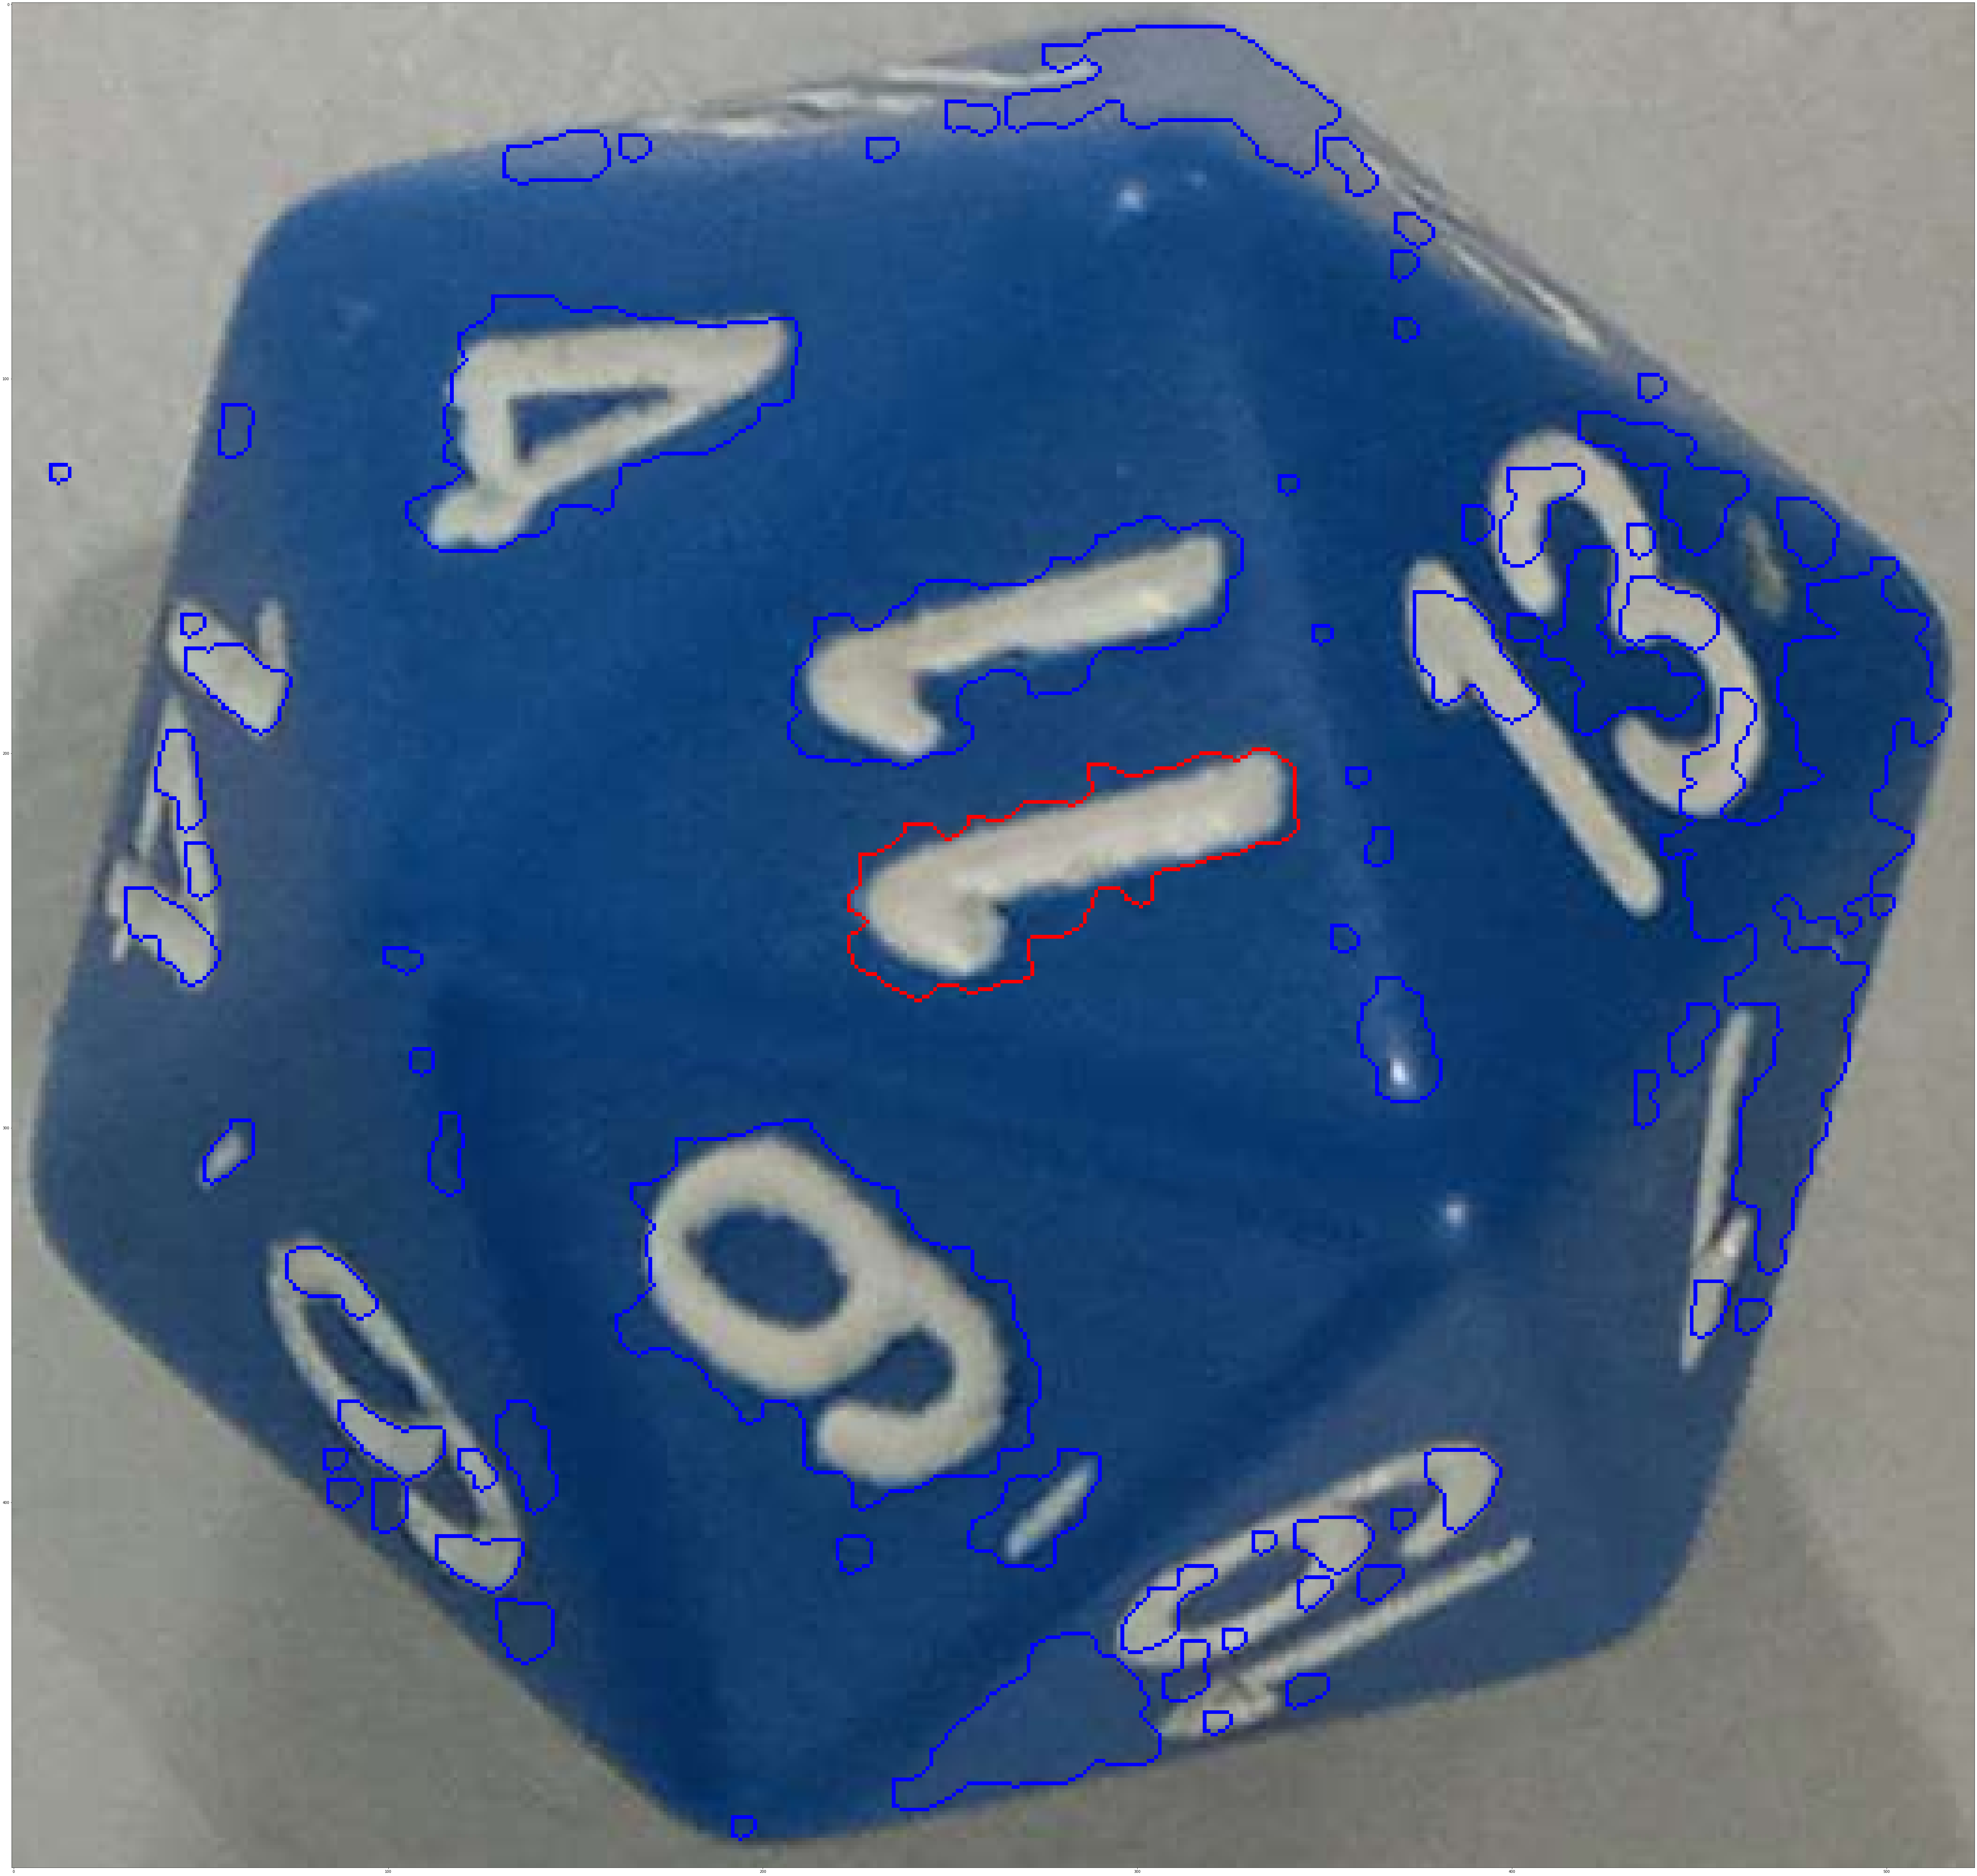

In [112]:
if debug == 1:
    cv2.drawContours(dieRawTemp,[closestContur],-1,(255,0,0),1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

whats a moment?

In [113]:
def conturMassCenter(contur):
    moment = cv2.moments(contur)
    return (moment['m10'] / (moment['m00'] + 1e-5), moment['m01'] / (moment['m00'] + 1e-5))

def sizeRelativeToImage(contur,image):
    Height,Width = dieRawTemp.shape[:2]
    imageSize = Height*Width
    hull = cv2.convexHull(contur)
    hullArea = cv2.contourArea(hull)
    return hullArea/imageSize

def getHullIfNeeded(contur):
    if not(cv2.isContourConvex(contur)):
        return cv2.convexHull(contur)
    else:
        return contur

def angleBettweenConturs(contur1,contur2):
    hull1 = getHullIfNeeded(contur1)
    hull2 = getHullIfNeeded(contur2)
    [vx1,vy1,x1,y1] = cv2.fitLine(hull1, cv2.DIST_L2,0,0.01,0.01)
    [vx2,vy2,x2,y2] = cv2.fitLine(hull2, cv2.DIST_L2,0,0.01,0.01)
    return angleBettween(vx1,vy1,vx2,vy2)

def angleBettweenContursShouldBe1_6Rad(contur1,contur2):
    hull1 = getHullIfNeeded(contur1)
    hull2 = getHullIfNeeded(contur2)
    [vx1,vy1,x1,y1] = cv2.fitLine(hull1, cv2.DIST_L2,0,0.01,0.01)
    [vx2,vy2,x2,y2] = cv2.fitLine(hull2, cv2.DIST_L2,0,0.01,0.01)
    vx3 = x1 - x2
    vy3 = y1 - y2
    return angleBettween(vx1,vy1,vx3,vy3)

def distBettweenConturs(contur1,contur2):
    point1 = conturMassCenter(contur1)
    point2 = conturMassCenter(contur2)
    dist = distBettweenPoints(point1[0],point1[1],point2[0],point2[1])
    return dist

def pythagoras(x,y):
    x2 = x**2
    y2 = y**2
    return sqrt(x2+y2)

def dotProduct(x1,y1,x2,y2):
    return (x1*x2)+(y1*y2)

def angleBettween(vector1x,vector1y,vector2x,vector2y):    
    vec1Len = pythagoras(vector1x,vector1y)
    vec2Len = pythagoras(vector2x,vector2y)
    
    dotProd = dotProduct(vector1x,vector1y,vector2x,vector2y)
    
    return acos((dotProd[0]/((vec1Len*vec2Len)+1e-5)))
 
def MinBoxAngleDif(contur1,contur2):
    minBox1 = cv2.minAreaRect(contur1)
    minBox2 = cv2.minAreaRect(contur2)
    return minBox1[2]-minBox2[2]

def imgRotate(img,angle):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))
    return img_rot
    
def confideceOfBeingNumberInital(contur,point,img):
    conturPoint = conturMassCenter(contur)
    distance = distBettweenPoints(conturPoint[0],conturPoint[1],point[0],point[1])
    imageDistance = img
    Height,Width = dieRawTemp.shape[:2]
    AvrageImageLength = (Height*Width)/2
    distRel = distance/AvrageImageLength
    sizeRel = sizeRelativeToImage(contur,img)
    if(0.005<sizeRel):#if it takes up less than half a percent of the image its not a number
        return distRel
    else:
        return 1
    
def devationFrom(number,ideal):
    value =  ideal-number
    if value < 0:
        value = value * -1
    return value

def mapNumbers(orginalNum,OrignalRangeMin,OrignalRangeMax,newRangeMin,newRangeMax):
    #print("           ((",newRangeMin,"-",newRangeMax,")/(",OrignalRangeMin,"-",OrignalRangeMin,"+1e-8 ))*(",orginalNum,"-",OrignalRangeMin,")+",newRangeMin,")")
    #print(np.interp(orginalNum,[OrignalRangeMin,OrignalRangeMax],[newRangeMin,newRangeMax]))
    return np.interp(orginalNum,[OrignalRangeMin,OrignalRangeMax],[newRangeMin,newRangeMax])#(((newRangeMin-newRangeMax)/(OrignalRangeMin-OrignalRangeMin+1e-8))*(orginalNum-OrignalRangeMin)+newRangeMin)

def isAboveORbellow(contur1,contur2): # is contur2 above or below contur 1
    point1 = conturMassCenter(contur1)
    point2 = conturMassCenter(contur2)
    if(point1[1]<point2[1]):
        return 0
    else:
        return 1
    
def confideceOfBeingSecondNumber(conturCenter,conturPossible,img):
    sizeScore = -100000000000000000000000000
    score = -100000000000000000000000000
    distScore = -100000000000000000000000000
    dist = distBettweenConturs(conturCenter,conturPossible)
    linedUpLineAngle = angleBettweenConturs(conturCenter,conturPossible)
    RightAngleLine = angleBettweenContursShouldBe1_6Rad(conturCenter,conturPossible)
    boxAngle = MinBoxAngleDif(conturCenter,conturPossible)
    conturCenterSize = sizeRelativeToImage(conturCenter,img)
    conturPosiblSize = sizeRelativeToImage(conturPossible,img)
    Height,Width = img.shape[:2]
    AvrageImageLength = (Height+Width)/2
    #now that weve got everything we want to use in our comparsions lets combine it
    #angles
    #print("  linedUpLineAngle",linedUpLineAngle*57.29578)
    #print("  RightAngleLine",RightAngleLine*57.29578)
    #print("  boxAngle",boxAngle)
    distRel = dist/AvrageImageLength
    if(distRel < 0.25):
        distScore = mapNumbers(distRel,0,0.25,100,0)
    
    if (linedUpLineAngle<0.174 and RightAngleLine>1.45 and RightAngleLine<1.75) or (boxAngle<10 and boxAngle>-10):
        #angle is good add somthing based on how good it is
        
        #print("linedUpLineAngle",linedUpLineAngle)
        linedUpLineAngle = mapNumbers(linedUpLineAngle,0,0.174,50,0)
        devation = devationFrom(RightAngleLine,1.6)
        #print("devation",devation)
        devation = mapNumbers(devation,0,0.15,50,0)
        
        boxDevation = devationFrom(boxAngle,0)
        #print("boxDevation",boxDevation)
        boxScore = mapNumbers(boxDevation,0,10,100,0)
        
        angleScore = linedUpLineAngle+devation
        
        if angleScore < boxScore:
            score = angleScore
        else:
            score = boxScore
        #print("  score",score)
    sizeRatio = conturCenterSize/conturPosiblSize
    if (sizeRatio<4 and sizeRatio>0.25):
        #size is alright add somthing based on how good it is
        #print("  sizeRatio",sizeRatio)
        if sizeRatio>1:
            sizeScore = mapNumbers(sizeRatio,1,5,100,0)
        else:
            sizeScore = mapNumbers(sizeRatio,1,0.25,100,0)
        #print("  sizeScore",sizeScore)
    #else:
    #    print("size ratio was to big/small:",sizeRatio)
    #print(sizeScore)
    #print(score)
    #print(distScore)
    #print(sizeScore + score + distScore)
    return sizeScore + score + distScore

find the starting Num

In [114]:
bestContur = 0
bestConturdist = 1
h, w = diceMask.shape
midY, midX = h/2, w/2
for contur in contoursWithoutDice:
    if confideceOfBeingNumberInital(contur,(midY, midX),dieRaw) < bestConturdist:
        bestConturdist = confideceOfBeingNumberInital(contur,(midY, midX),dieRaw)
        bestContur = contur
#rprint(bestContur)

In [115]:
bestSecondContur = 0
bestSecondScore = 0
i = 0
for contur in contoursWithoutDice:
    #print("testing contur",i)
    i = i + 1
    if not(conturMassCenter(contur) == conturMassCenter(bestContur)):
        if confideceOfBeingSecondNumber(bestContur,contur,dieRaw) > bestSecondScore:
            bestSecondContur = contur
            bestSecondScore = confideceOfBeingSecondNumber(bestContur,contur,dieRaw)
            #print("new best score is:",bestSecondScore)
        #else:
            #print("score remains at:",bestSecondScore)


202.62380876791678


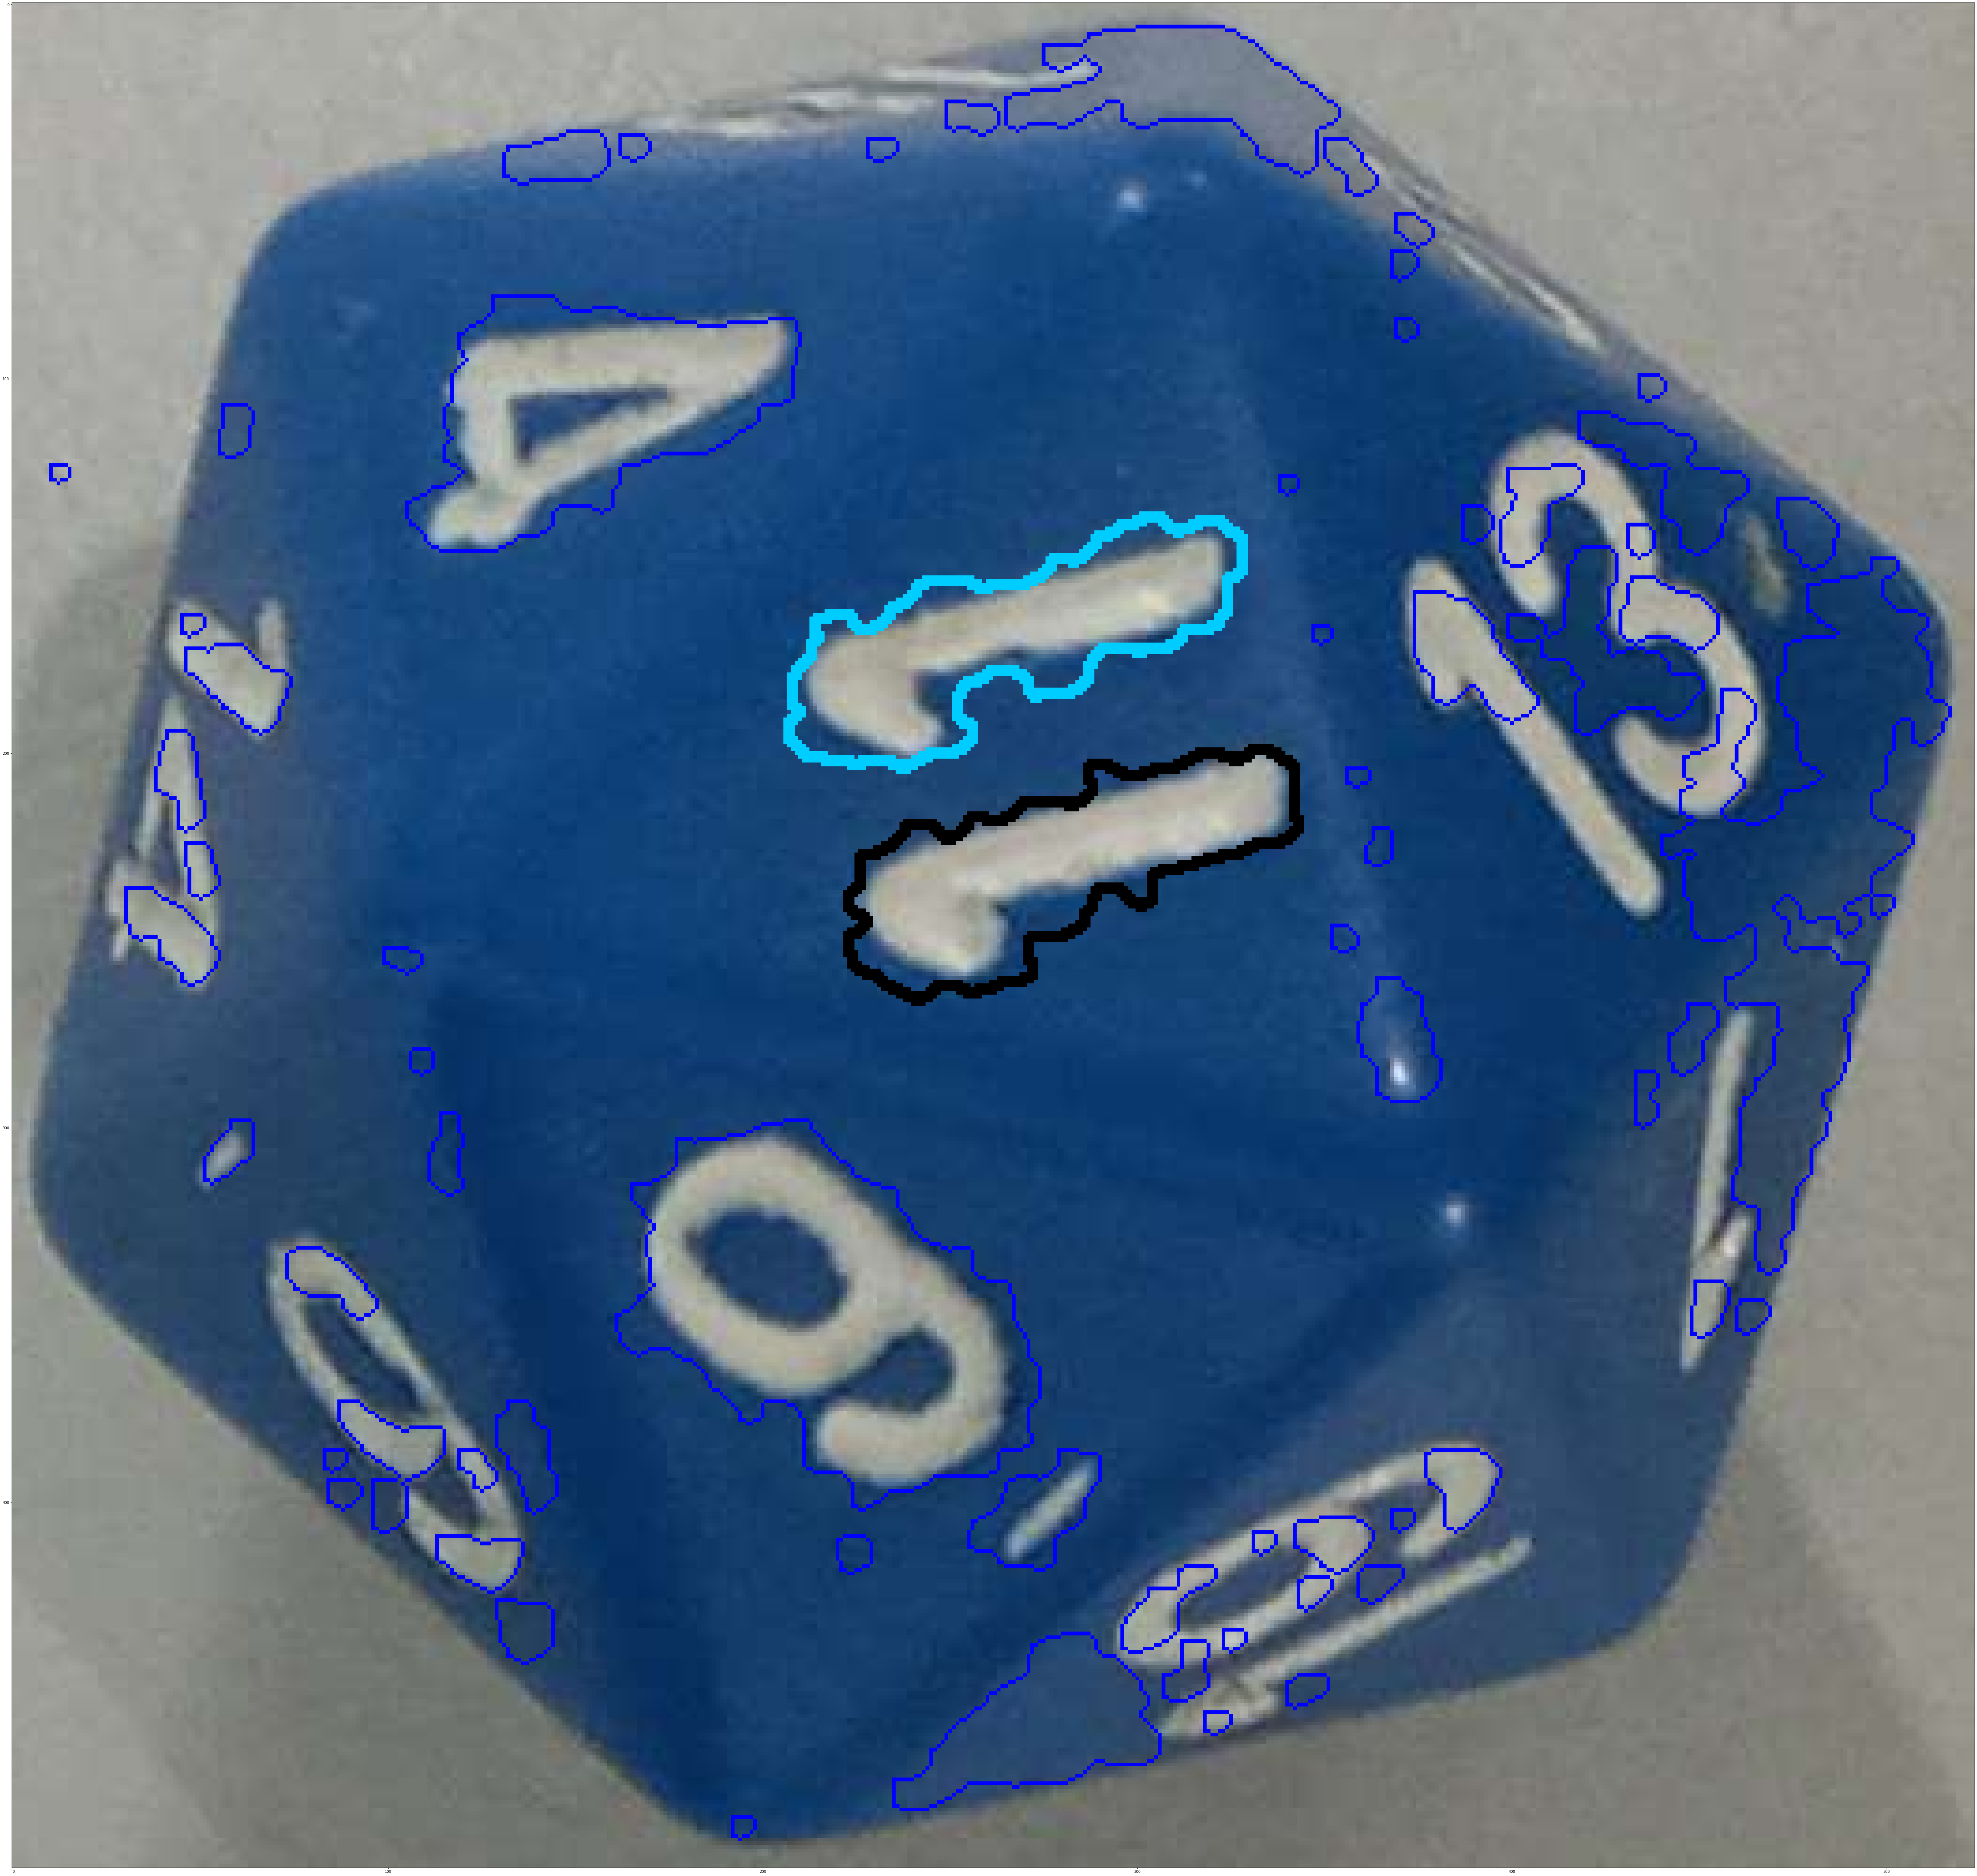

In [116]:
#print(bestSecondContur)
if debug == 1:
    print(bestSecondScore)

    cv2.drawContours(dieRawTemp,[bestContur],-1,(0,0,0),2)
    if not bestSecondScore == 0:
        cv2.drawContours(dieRawTemp,[bestSecondContur],-1,(0,205,255),2)
    
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

[array([[[249, 158]],

       [[248, 159]],

       [[247, 159]],

       [[245, 161]],

       [[244, 161]],

       [[241, 164]],

       [[241, 168]],

       [[242, 169]],

       [[241, 170]],

       [[242, 171]],

       [[242, 174]],

       [[241, 175]],

       [[241, 180]],

       [[240, 181]],

       [[240, 182]],

       [[239, 183]],

       [[239, 185]],

       [[238, 186]],

       [[238, 187]],

       [[237, 188]],

       [[237, 190]],

       [[236, 191]],

       [[236, 198]],

       [[235, 199]],

       [[235, 200]],

       [[234, 201]],

       [[233, 201]],

       [[233, 202]],

       [[231, 204]],

       [[230, 204]],

       [[230, 205]],

       [[229, 206]],

       [[229, 207]],

       [[228, 208]],

       [[228, 209]],

       [[229, 209]],

       [[230, 210]],

       [[234, 210]],

       [[236, 212]],

       [[236, 213]],

       [[237, 214]],

       [[236, 215]],

       [[237, 216]],

       [[237, 217]],

       [[236, 218]],

       [[

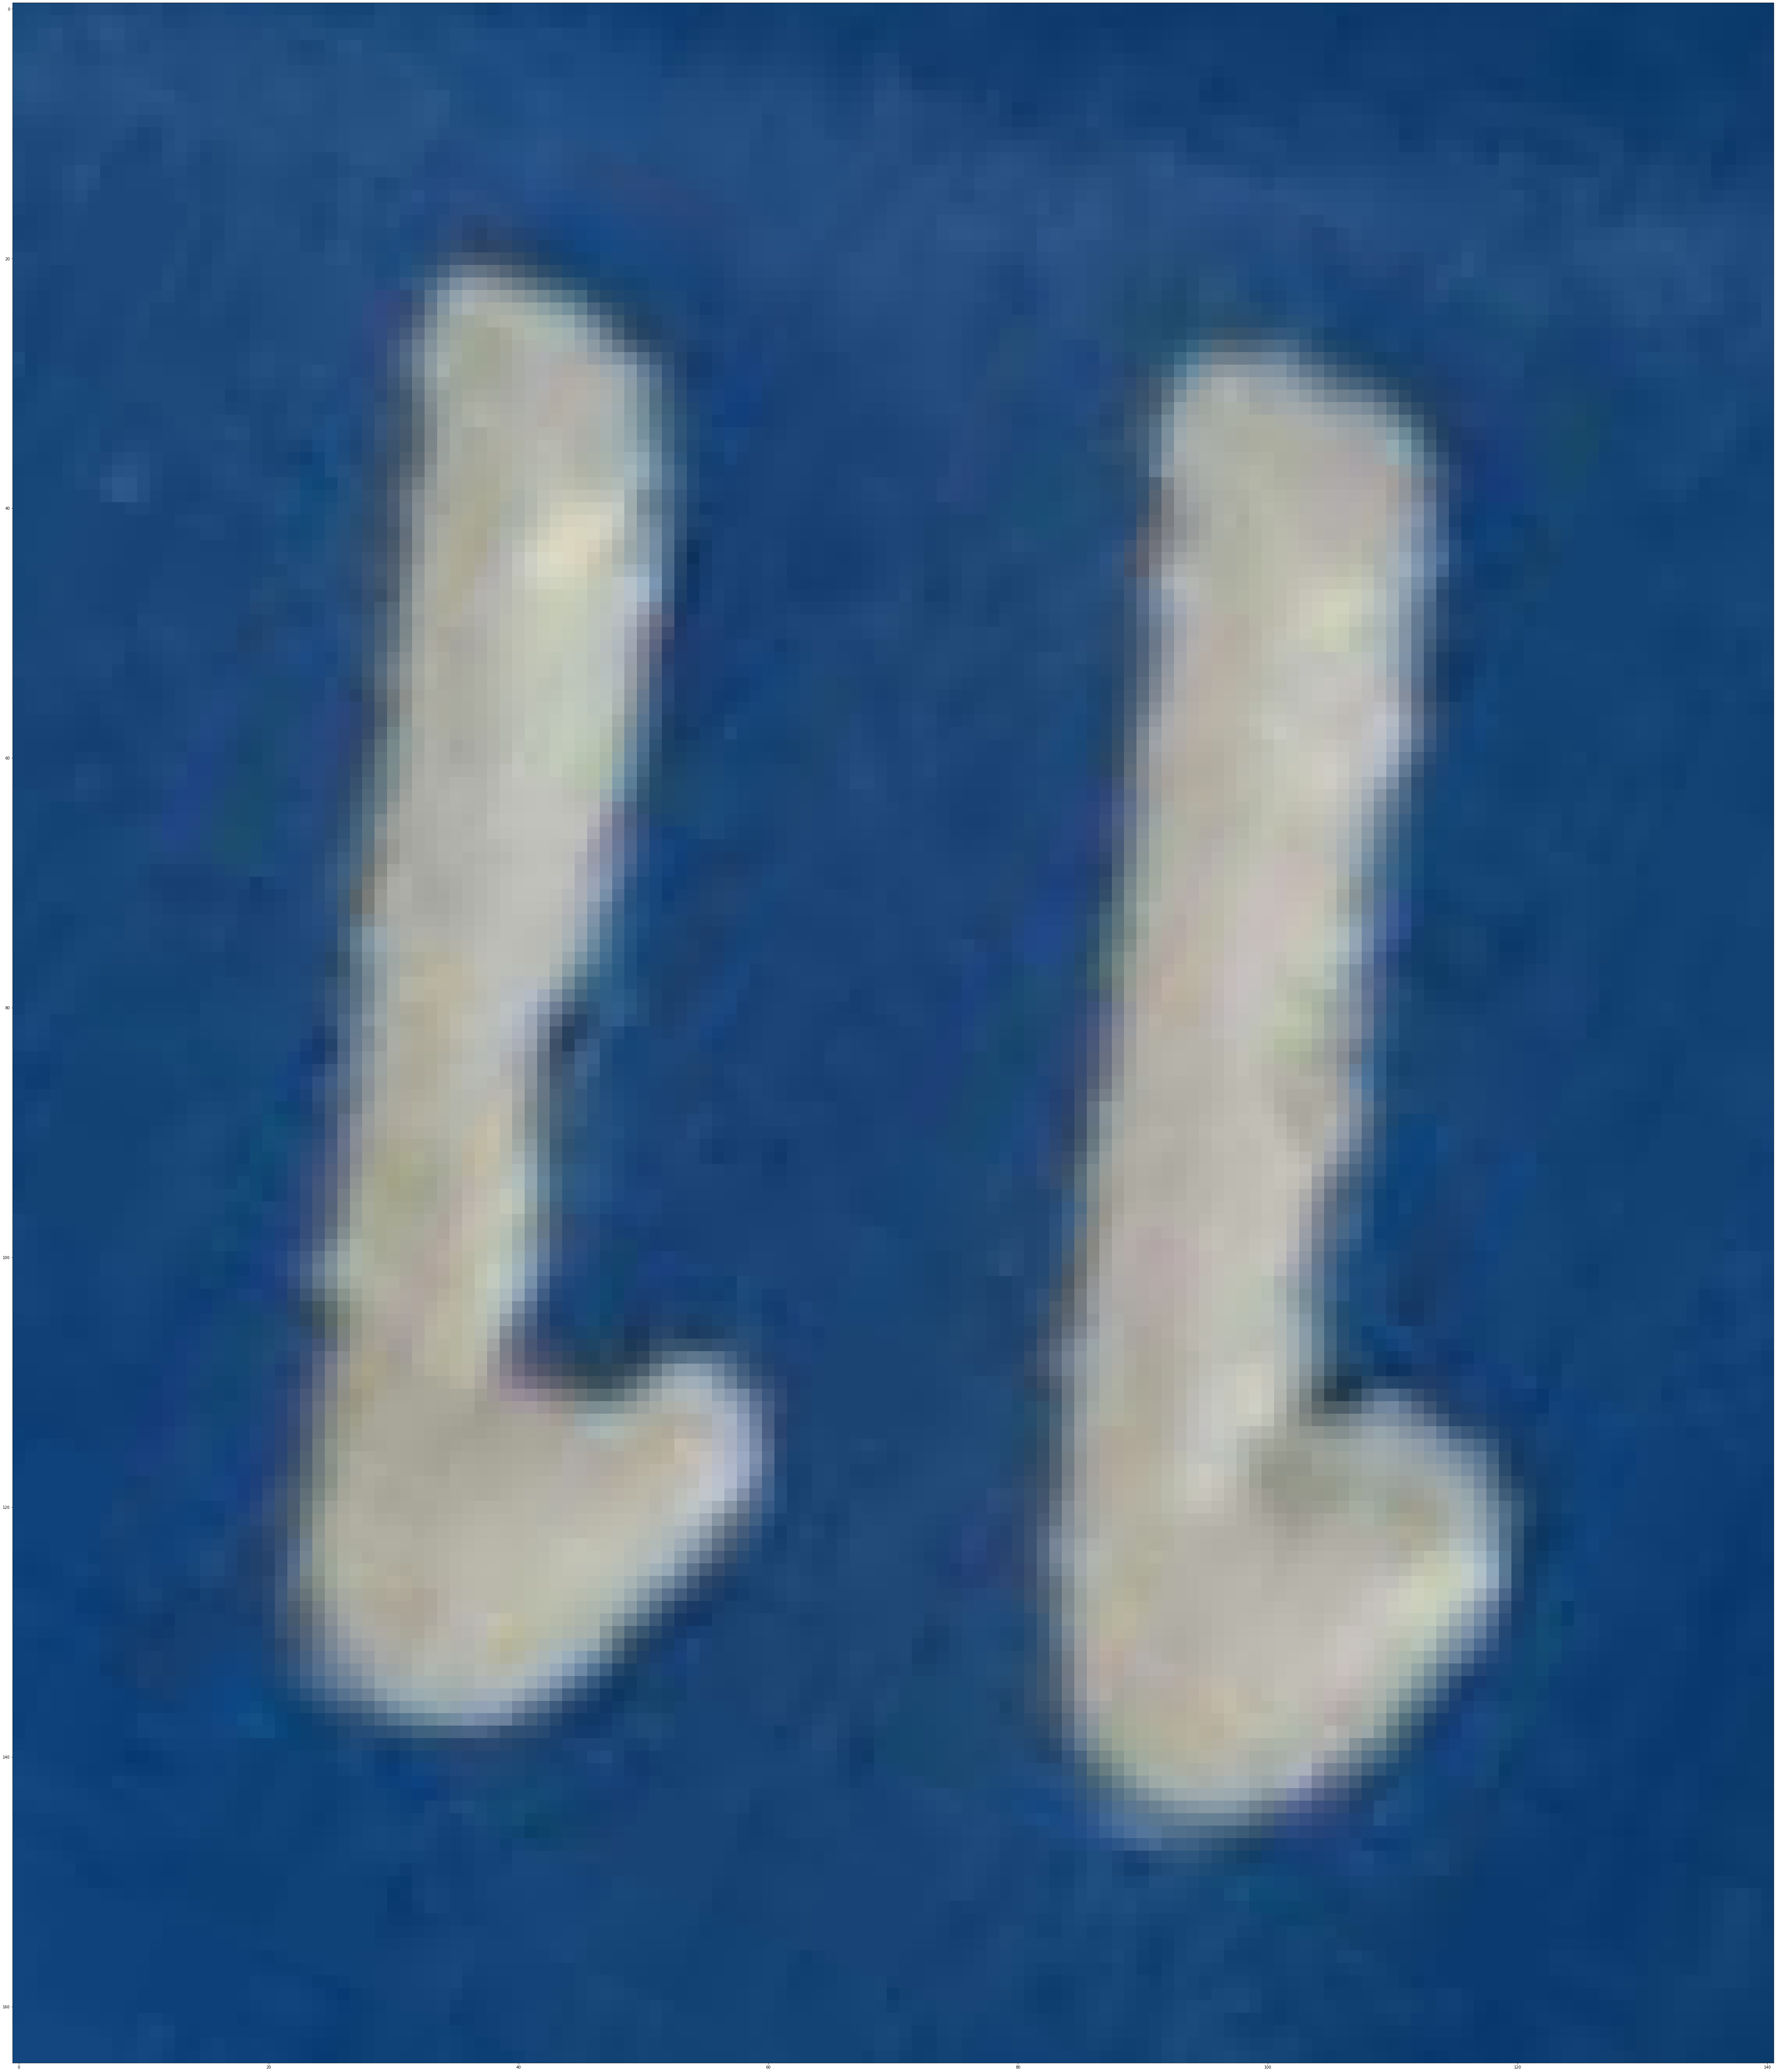

In [88]:
#first rotate the conturs to fit the line
maskOfConturs = np.zeros(shape=diceMask.shape, dtype=np.uint8)
contursToDraw = 0
if bestSecondScore != 0:
    contursToDraw = [bestContur,bestSecondContur]
else:
    contursToDraw = [bestContur]

cv2.drawContours(maskOfConturs,contursToDraw,-1,255,thickness=cv2.FILLED)

[vx1,vy1,x1,y1] = cv2.fitLine(bestContur, cv2.DIST_L2,0,0.01,0.01)
angleToRoateBy = angleBettween(vx1,vy1,0,-1)

angleToRoateBy = angleToRoateBy%math.pi
maskOfConturs = imgRotate(maskOfConturs,(angleToRoateBy*57.29578))
imageRoated = imgRotate(dieRaw,(angleToRoateBy*57.29578))
(t,maskOfConturs) = cv2.threshold(maskOfConturs,100, 255, cv2.THRESH_BINARY)
contursToCropTo,hierarchy = cv2.findContours(maskOfConturs, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

best = contursToCropTo[0]
print(contursToCropTo)
x1,y1,w,h = cv2.boundingRect(best)
x2 = x1+w
y2 = y1+h
xMin = min(x1,x2)
yMin = min(y1,y2)
xMax = max(x1,x2)
yMax = max(y1,y2)

if bestSecondScore != 0:
    best = contursToCropTo[1]
    x3,y3,w,h = cv2.boundingRect(best)
    x4 = x3+w
    y4 = y3+h
    xMin = min(x1,x2,x3,x4)
    yMin = min(y1,y2,y3,y4)
    xMax = max(x1,x2,x3,x4)
    yMax = max(y1,y2,y3,y4)

buffer = 15
finalImage = imageRoated[yMin-buffer:yMax+buffer,xMin-buffer:xMax+buffer]

plt.figure(figsize=(100,100))
plt.imshow(finalImage)
#if theres a second contur combine them
#if bestSecondScore > 0:
#    rows,cols = img.shape[0], img.shape[1]
#    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
#    img_rot = cv2.warpAffine(img,M,(cols,rows))
#else:

#find the max x,y and min x,y and make the box

#rotate the image to fit the line

#crop to the box
#flip the box
#tada!

if prefrecnce for which way up - 3 hours
    find the closest contur
    is it above or below on each roation
    same cheap draw the conturs trick
    use bounding boxes and just get avrage value
    make sure its atleast like 10% of the main contur and biger than 50% if it is its problay a digit
    then relase two images (the image croped and rotated 180 with a prefrence digt -1 for none)
after that combine - 1
    number detection works like this:
        if its 0,1,2,3,4,5,7,8
            np use as is
        if its 6,9
            check prefrence roation use that one
        if its > 20 flip the number around so 91 becomes 16
    done then done - 2 hours
    blog writeup
then go and work on security - 1 hour

5 hours of essay writing

1 hour for presnation
7 hours for essay and coding

hell

In [76]:
prefrence = -1
closestSecondContur = 0
h, w = diceMask.shape
distance = h+w
if bestSecondScore == 0:#6&9 are 1 digit
    bestConturPoint = conturMassCenter(bestContur)
    for contur in contoursWithoutDice:
        conturPoint = conturMassCenter(contur)
        if bestConturPoint != conturPoint:
            distTemp = distBettweenPoints(conturPoint[0],conturPoint[1],bestConturPoint[0],bestConturPoint[1])
            if distance > distTemp:
                distance = distTemp
                closestSecondContur = contur
    maskOfConturs = np.zeros(shape=diceMask.shape, dtype=np.uint8)
    contursToDraw = [bestContur,closestSecondContur]
    cv2.drawContours(maskOfConturs,contursToDraw,-1,255,thickness=cv2.FILLED)
    maskOfConturs = imgRotate(maskOfConturs,(angleToRoateBy*57.29578))
    contursToCheck,hierarchy = cv2.findContours(maskOfConturs, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #get the bigest contur
    if cv2.contourArea(cv2.convexHull(contursToCheck[0])) > cv2.contourArea(cv2.convexHull(contursToCheck[1])):
        prefrence = isAboveORbellow(contursToCheck[0],contursToCheck[1])
    else:
        prefrence = isAboveORbellow(contursToCheck[1],contursToCheck[0])

valueasdf = [finalImage,cv2.rotate(finalImage, cv2.ROTATE_180),prefrence]

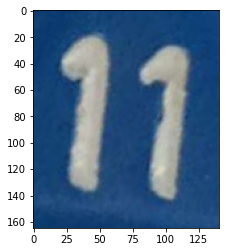

In [82]:
plt.imshow(valueasdf[1])

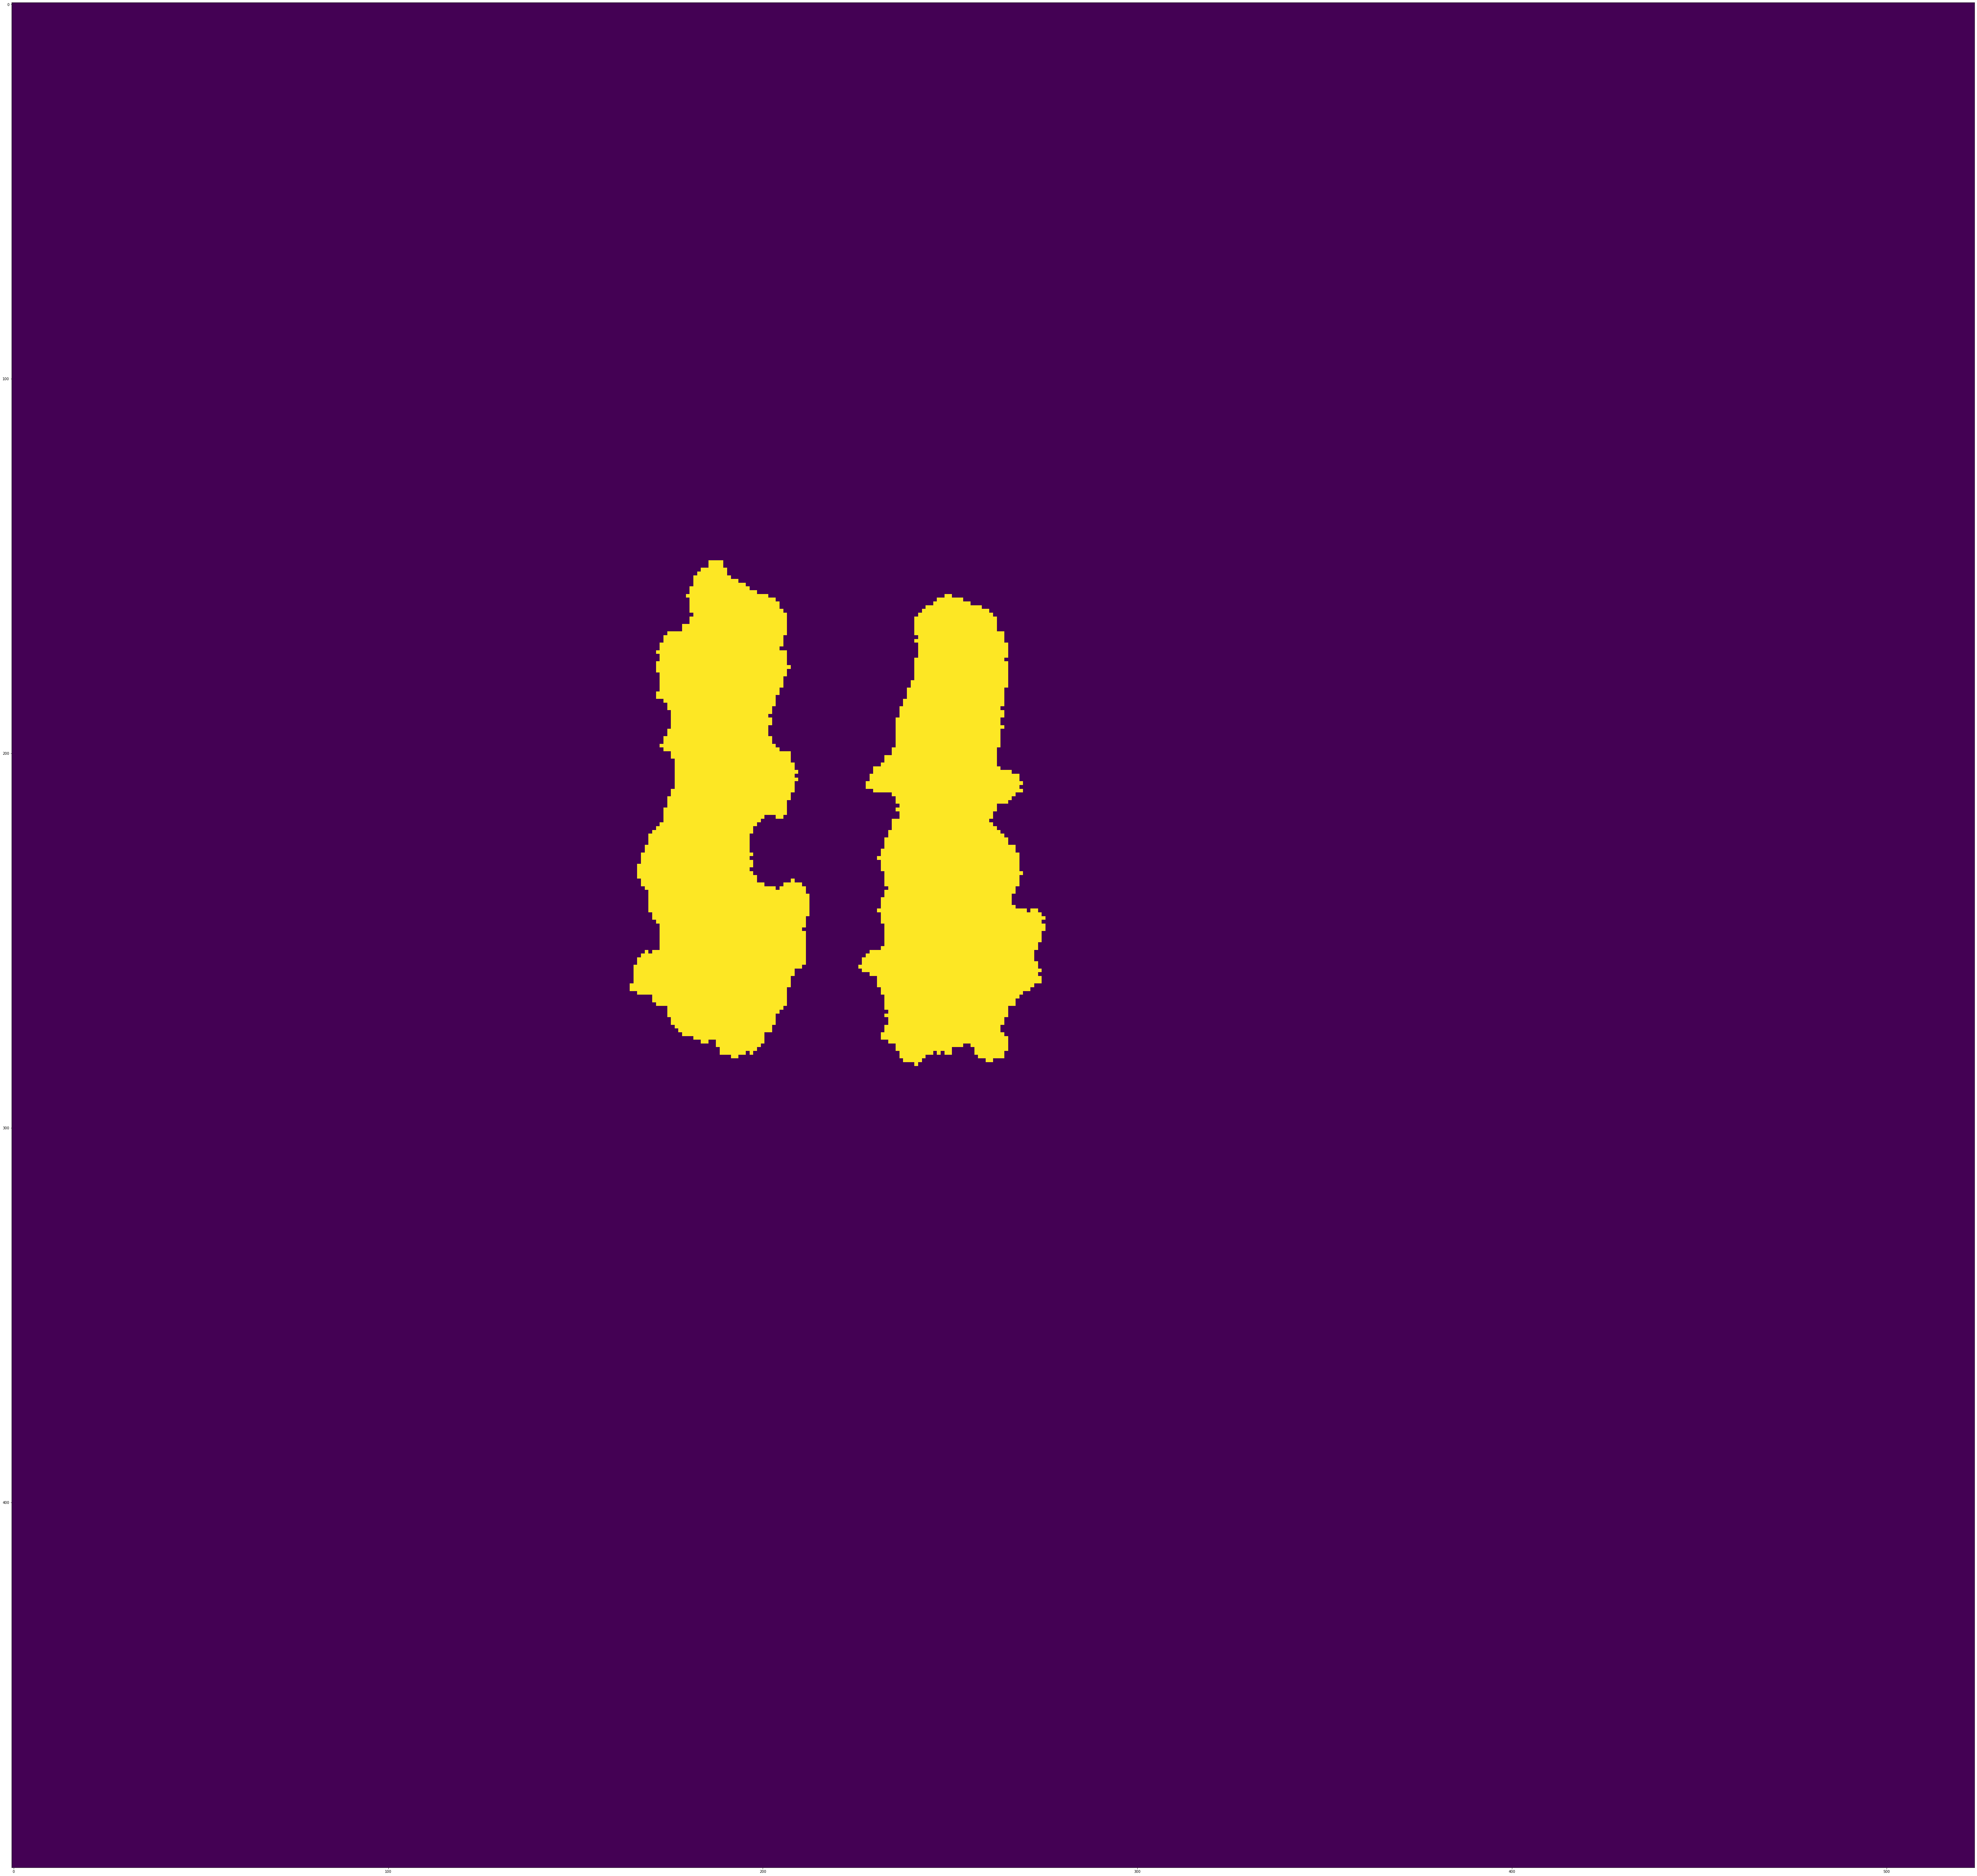

In [68]:
if debug == 1:
    plt.figure(figsize=(100,100))
    plt.imshow(maskOfConturs)

In [69]:
centerMoment = cv2.moments(closestContur)
if debug == 1:
    print(centerMoment)
centerMomentMassCenter = conturMassCenter(closestContur)
if debug == 1:
    print(centerMomentMassCenter)

#sourced from:
# Get the moments
mu = [None]*len(contoursWithoutDice)
for i in range(len(contoursWithoutDice)):
    mu[i] = cv2.moments(contoursWithoutDice[i])

    # Get the mass centers
mc = [None]*len(contoursWithoutDice)
for i in range(len(contoursWithoutDice)):
    # add 1e-5 to avoid division by zero
    mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))
if debug == 1:
    print(mc)

{'m00': 3732.0, 'm10': 1042895.6666666666, 'm01': 857360.0, 'm20': 295001346.0, 'm11': 238358802.41666666, 'm02': 197795164.0, 'm30': 84456367082.1, 'm21': 67074387738.6, 'm12': 54710196739.36667, 'm03': 45824514256.8, 'mu20': 3567430.7931106687, 'mu11': -1227754.060646683, 'mu02': 832096.0471597016, 'mu30': 25353782.32221985, 'mu21': -10691368.419936776, 'mu12': 1068931.1269527078, 'mu03': 2308056.0964431763, 'nu20': 0.25613698113292277, 'nu11': -0.08815117570746751, 'nu02': 0.05974343495148284, 'nu30': 0.02979810661156142, 'nu21': -0.012565483601298963, 'nu12': 0.0012563065848143035, 'nu03': 0.0027126406921543847}
(279.44685527122135, 229.73204654412635)
[(194.75431763006398, 486.5086012250522), (321.23179094730693, 458.5940699727333), (345.14281018465164, 449.836673491609), (274.21341134291896, 460.41820331295895), (136.6550800667454, 433.7625922036761), (310.4308664157241, 436.0501287866887), (224.4436633634689, 413.5517459164307), (124.738733552097, 415.3069820385177), (355.198135

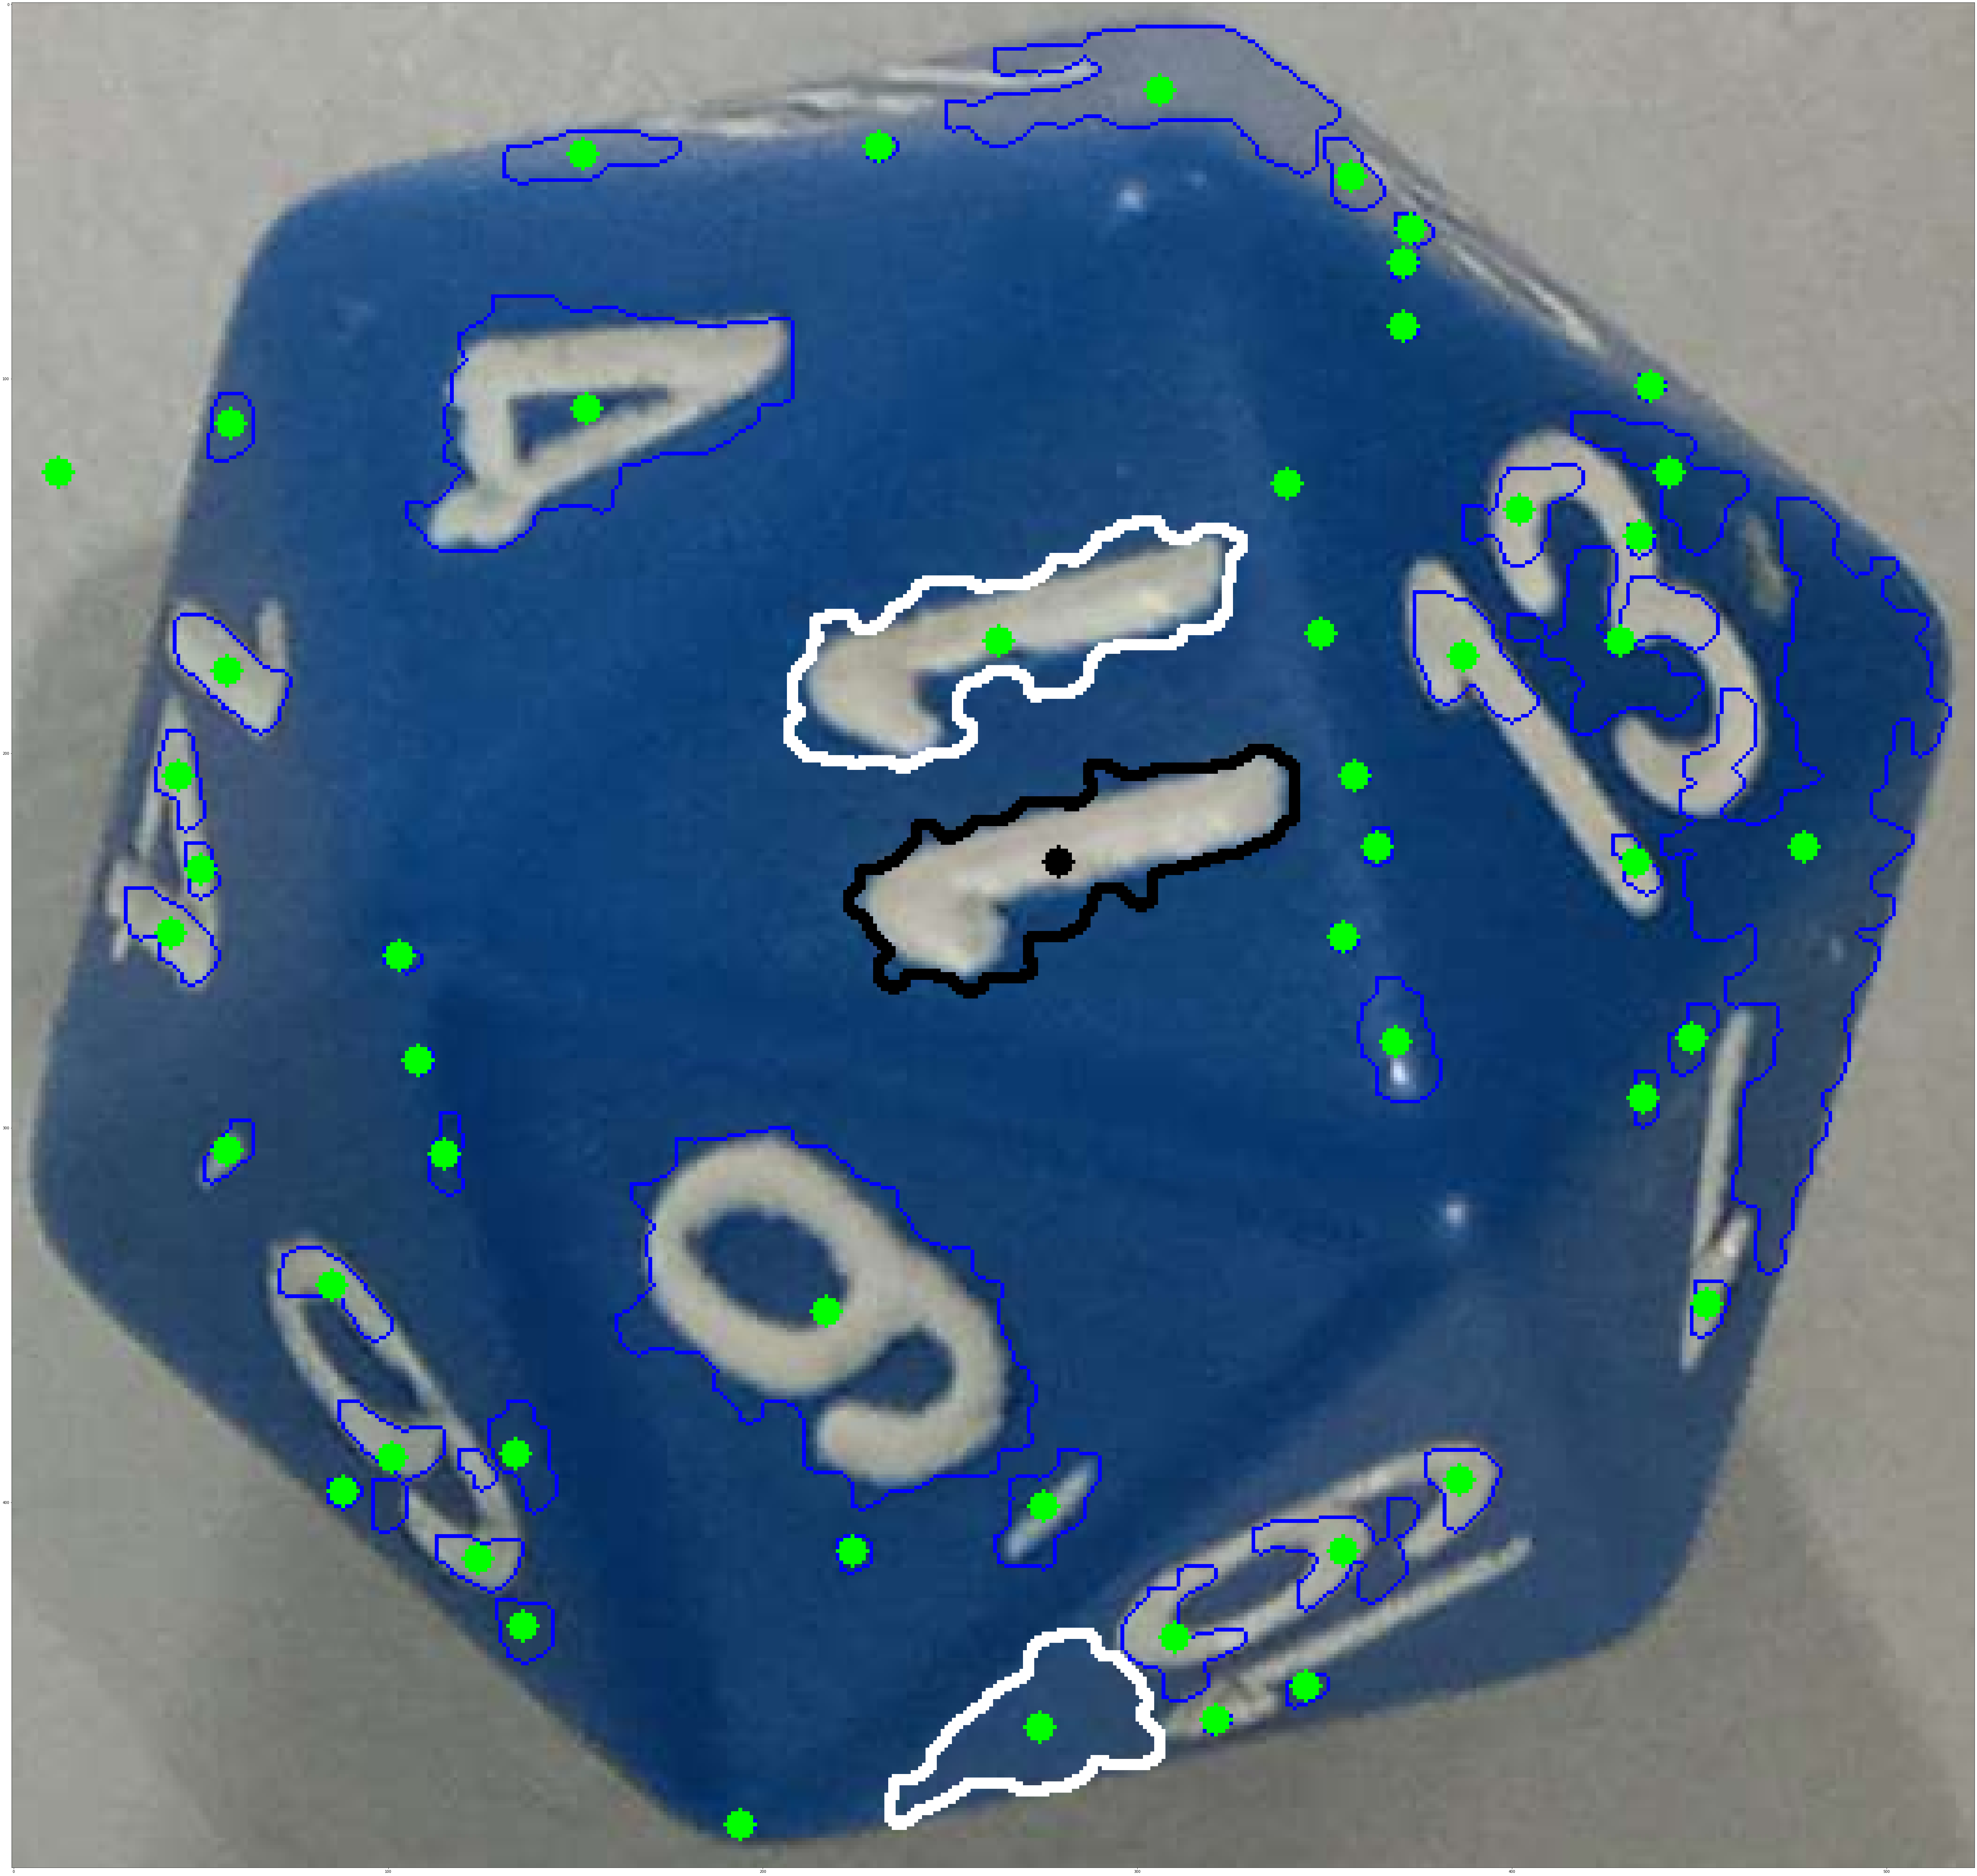

In [70]:
if debug == 1:
    for i in range(len(contoursWithoutDice)):
        cv2.circle(dieRawTemp, (int(mc[i][0]), int(mc[i][1])), 4, (0,255,0), -1)
    cv2.circle(dieRawTemp,(int(centerMomentMassCenter[0]),int(centerMomentMassCenter[1])),4,(0,0,0),-1)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

illustrated above is a problem spefilcy the 9 with two dots inside of it
the following code works around this but really this problem should be fixed using hirarcys
https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html
\<refactor using this might make faster code

In [75]:
distance = h+w #always way bigger than anyother possible distance

xCord1 = centerMomentMassCenter[0]
yCord1 = centerMomentMassCenter[1]
secondClosestCord = 0
secondClosestCordIndex = 0
i = 0
for cords in mc:
    xCord2 = cords[0]
    yCord2 = cords[1]
    if distBettweenPoints(xCord1,yCord1,xCord2,yCord2) < distance and cords != centerMomentMassCenter and cv2.pointPolygonTest(contour=closestContur,pt=cords,measureDist=False)==-1:
        secondClosestCord = cords
        secondClosestCordIndex = i
        distance = distBettweenPoints(xCord1,yCord1,xCord2,yCord2)
        
        
    i += 1
    
print(secondClosestCord)
print(secondClosestCordIndex)
print(distance)

(263.33081790670093, 170.20404048680874)
37
61.67098317275849


time to use this https://theailearner.com/tag/angle-of-rotation-by-cv2-minarearect/

vx1: [0.01516447] vy1: [0.999885] x: [202.3] y: [171.85]
vx2: [0.02134848] vy2: [0.9997721] x: [133.5] y: [172.6]


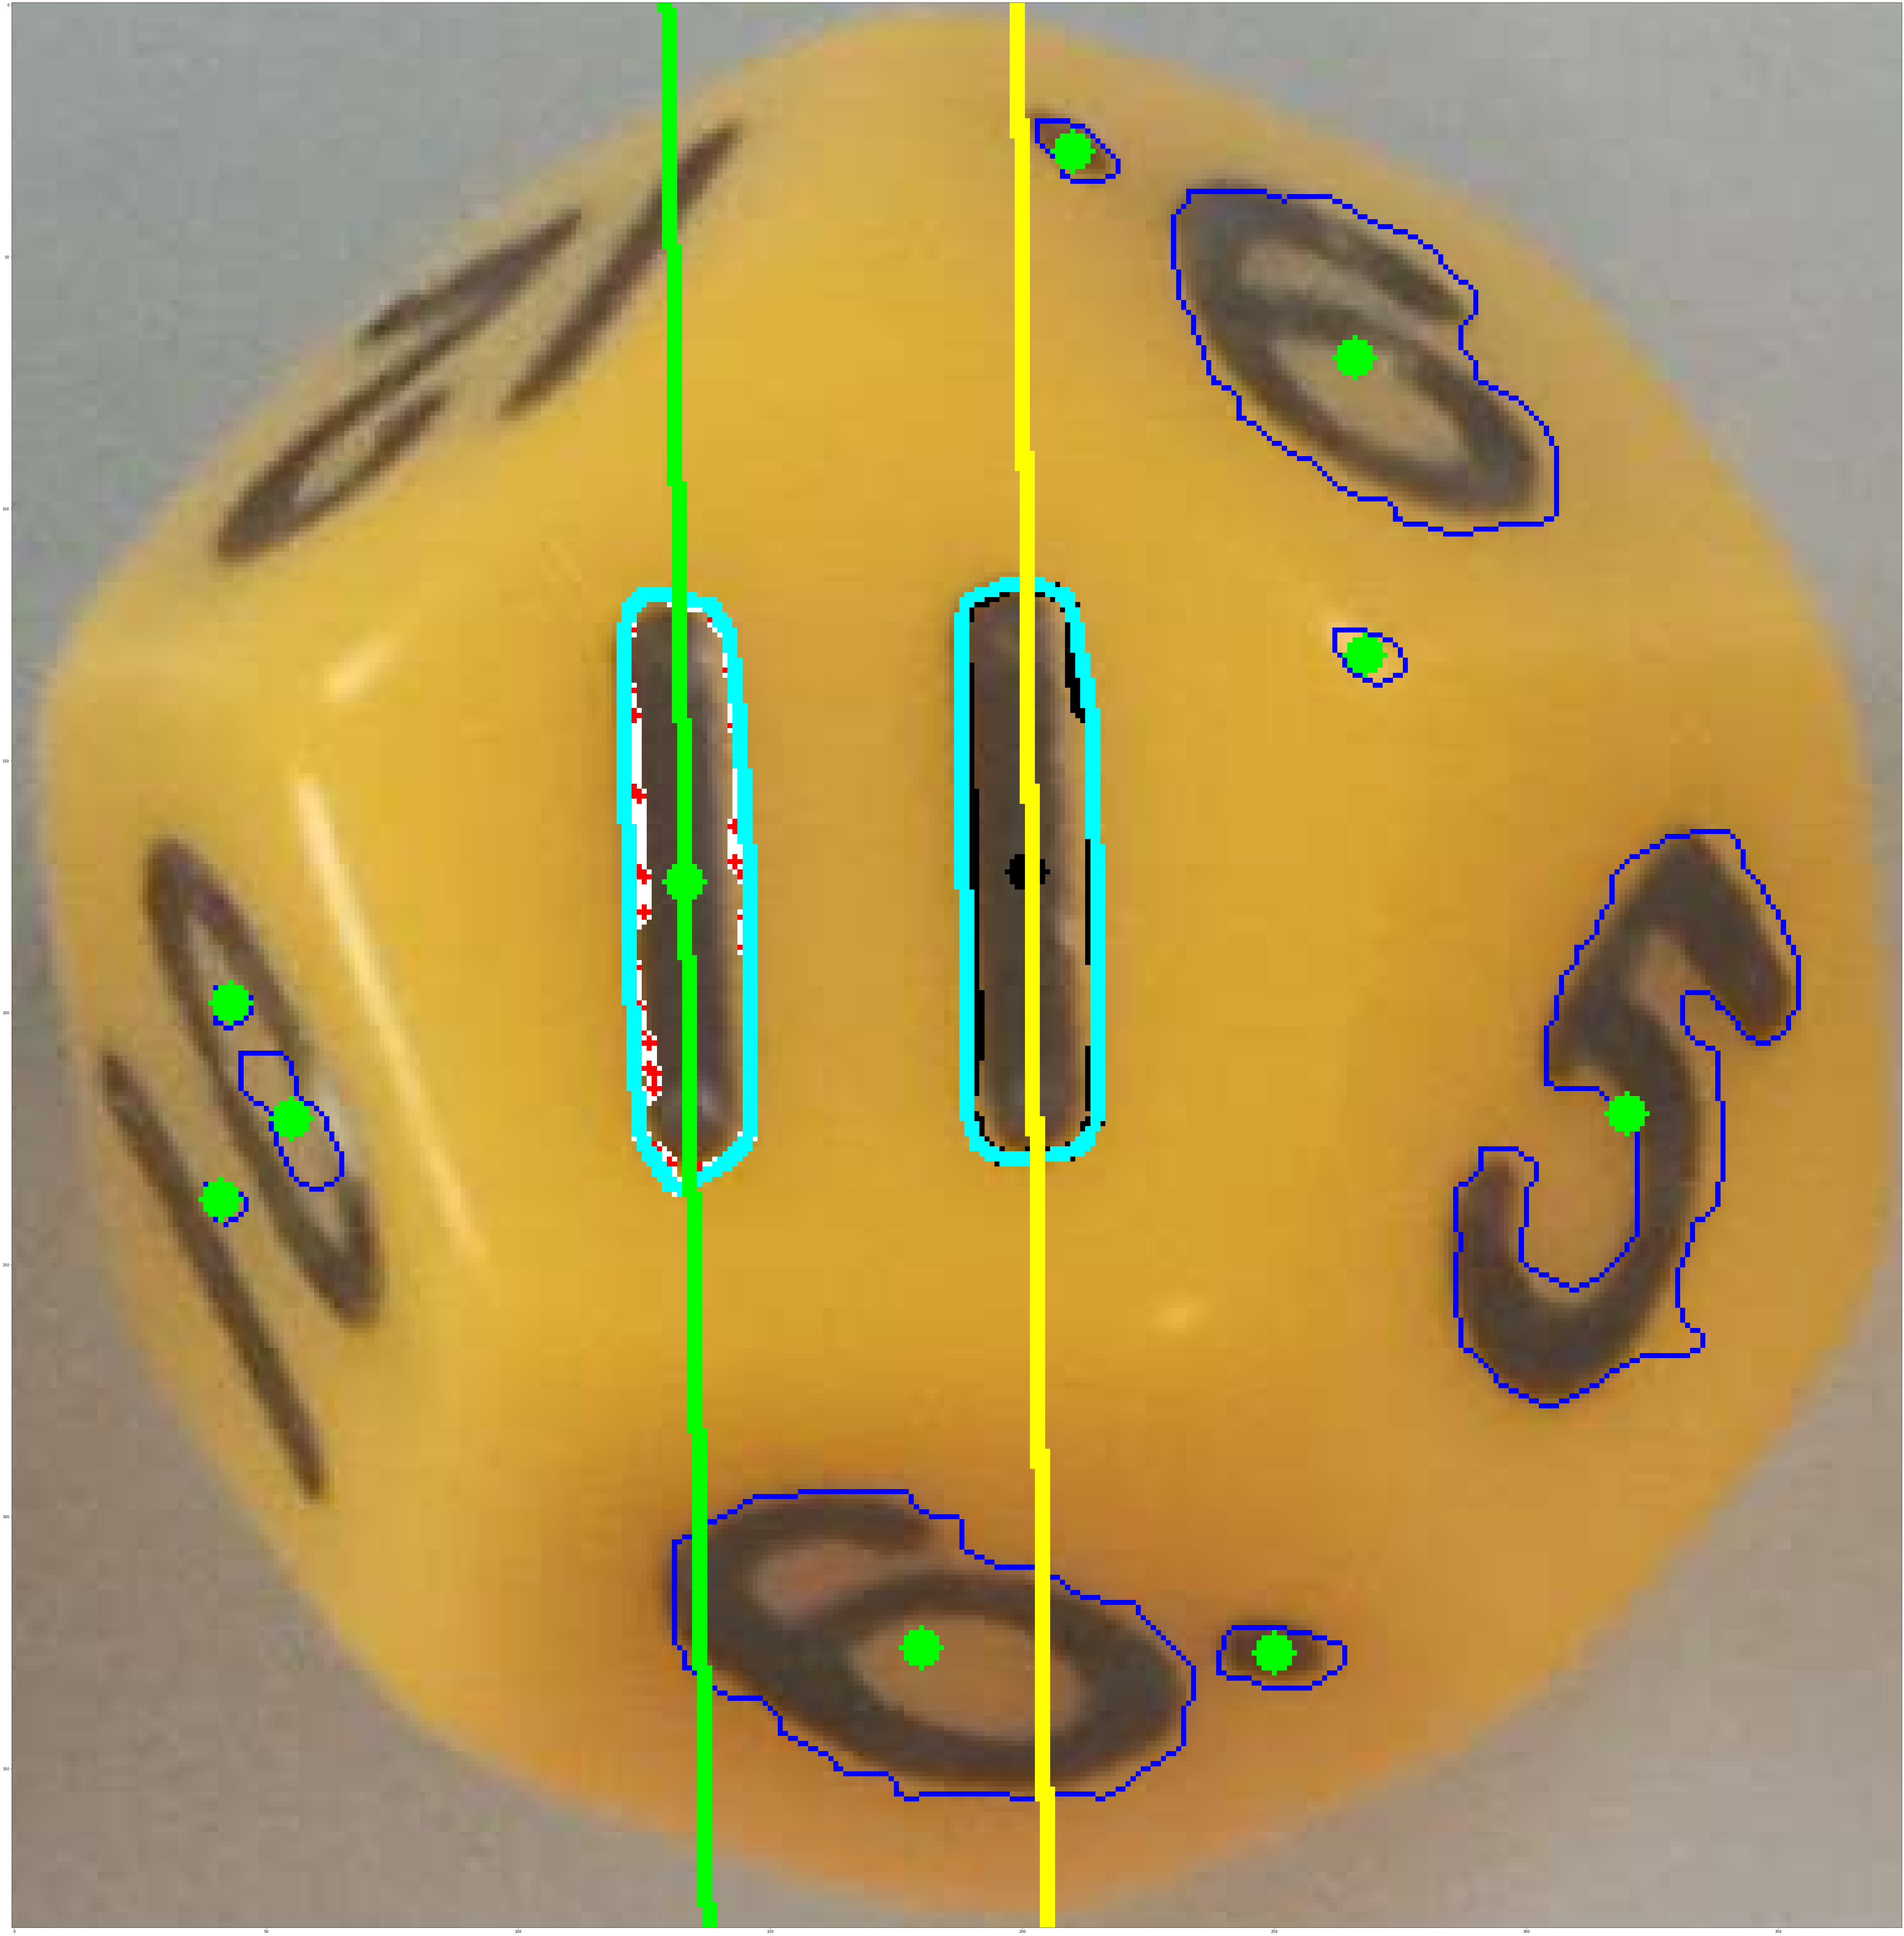

In [489]:
hullOfClosestCenter = cv2.convexHull(closestContur)
hullOfSecondClosest = cv2.convexHull(contoursWithoutDice[secondClosestCordIndex])

if debug == 1:
    cv2.drawContours(dieRawTemp,contoursWithoutDice[secondClosestCordIndex],-1,(255,0,0),2)
    cv2.drawContours(dieRawTemp,[hullOfClosestCenter],-1,(0,255,255),2)
    cv2.drawContours(dieRawTemp,[hullOfSecondClosest],-1,(0,255,255),2)

rows,cols = dieRawTemp.shape[:2]
        
[vx1,vy1,x1,y1] = cv2.fitLine(hullOfClosestCenter, cv2.DIST_L2,0,0.01,0.01)

if debug == 1:
    lefty = int((-x1*vy1/vx1) + y1)
    righty = int(((cols-x1)*vy1/vx1)+y1)
    cv2.line(dieRawTemp,(cols-1,righty),(0,lefty),(255,255,0),2)
    print("vx1:",vx1,"vy1:",vy1,"x:",x1,"y:",y1)

[vx2,vy2,x2,y2] = cv2.fitLine(hullOfSecondClosest, cv2.DIST_L2,0,0.01,0.01)

if debug == 1:
    lefty = int((-x2*vy2/vx2) + y2)
    righty = int(((cols-x2)*vy2/vx2)+y2)
    cv2.line(dieRawTemp,(cols-1,righty),(0,lefty),(0,255,0),2)
    print("vx2:",vx2,"vy2:",vy2,"x:",x2,"y:",y2)
    
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

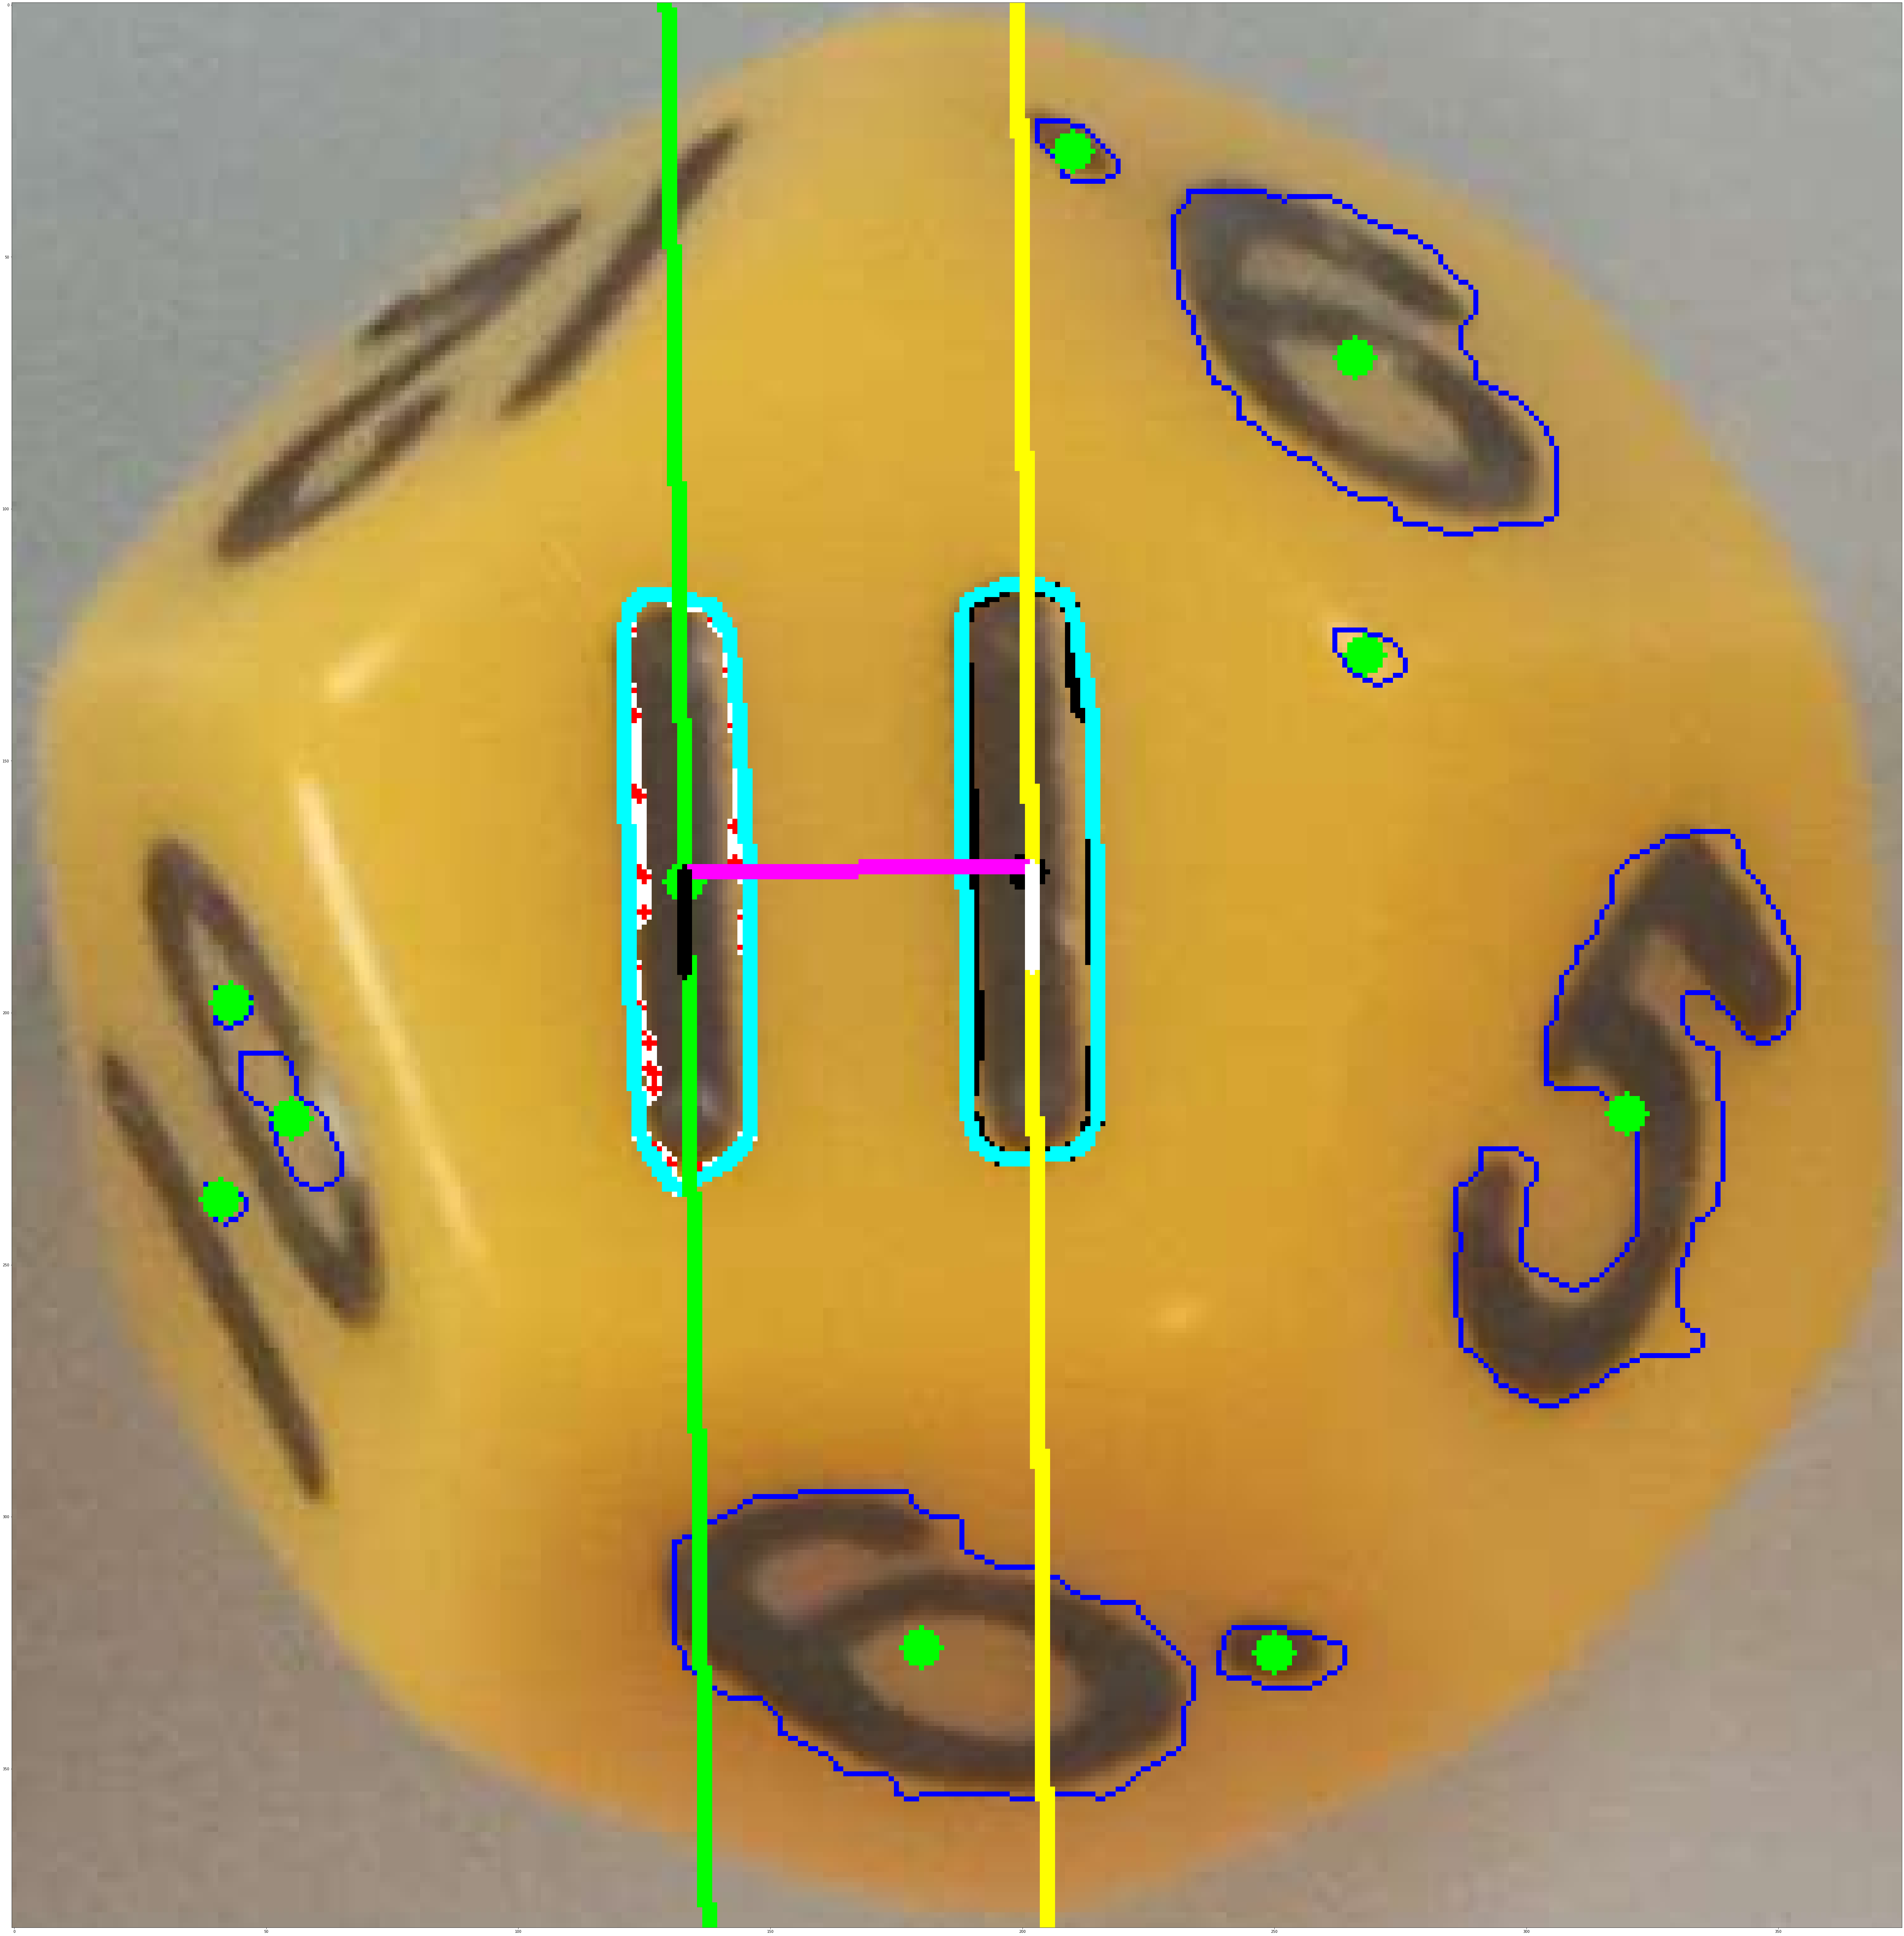

In [490]:
if debug == 1:
    cv2.line(dieRawTemp,(int(x2),int(y2)),(int(x1),int(y1)),(255,0,255),2)
    cv2.line(dieRawTemp,(int(x2),int(y2)),(int(x2+vx2*20),int(y2+vy2*20)),(0,0,0),2)
    cv2.line(dieRawTemp,(int(x1),int(y1)),(int(x1+vx1*20),int(y1+vy1*20)),(255,255,255),2)
    plt.figure(figsize=(100,100))
    plt.imshow(dieRawTemp)

In [491]:
from math import sqrt
from math import acos

def pythagoras(x,y):
    x2 = x**2
    y2 = y**2
    return sqrt(x2+y2)

def dotProduct(x1,y1,x2,y2):
    return (x1*x2)+(y1*y2)

def angleBettween(vector1x,vector1y,vector2x,vector2y):
    print(vector1x,vector1y,vector2x,vector2y)
    
    vec1Len = pythagoras(vector1x,vector1y)
    vec2Len = pythagoras(vector2x,vector2y)
    
    dotProd = dotProduct(vector1x,vector1y,vector2x,vector2y)
    print("acos(",dotProd[0],"/",vec1Len,"*",vec2Len,")")
    
    return acos((dotProd[0]/((vec1Len*vec2Len)+1e-5)))

# acos(dot product(U,V)/Mangitued V * Mangintued U)

In [492]:
angle = angleBettween(vx1,vy1,vx2,vy2)
vx3 = x1 - x2
vy3 = y1 - y2
print("vx3",vx3,"vy3",vy3)
shouldBe90 = angleBettween(vx1,vy1,vx3,vy3)
if debug == 1:
    print(angle,shouldBe90*57.29578)

[0.01516447] [0.999885] [0.02134848] [0.9997721]
acos( 0.9999808 / 1.0 * 0.9999999701976772 )
vx3 [68.8] vy3 [-0.75]
[0.01516447] [0.999885] [68.8] [-0.75]
acos( 0.29340154 / 1.0 * 68.80409093714923 )
0.007637112580294542 89.75567345341449


In [493]:
def crop_minAreaRect(img, rect):

    # rotate img
    angle = rect[2]
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))

    # rotate bounding box
    rect0 = (rect[0], rect[1], 0.0) 
    box = cv2.boxPoints(rect0)
    pts = np.int0(cv2.transform(np.array([box]), M))[0]    
    pts[pts < 0] = 0

    # crop
    img_crop = img_rot[pts[1][1]:pts[0][1], 
                       pts[1][0]:pts[2][0]]

    return img_crop

def imgRotate(img,angle):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))
    
#from: https://stackoverflow.com/a/48553593
def getSubImage(rect, src):
    # Get center, size, and angle from rect
    center, size, angle = rect
    # Convert to int 
    center, size = tuple(map(int, center)), tuple(map(int, size))
    if debug == 1:
        print(center)
        print(size)
    size = (size[0]+14,size[1]+14)
    # Get rotation matrix for rectangle
    M = cv2.getRotationMatrix2D( center, angle, 1)
    # Perform rotation on src image
    dst = cv2.warpAffine(src, M, src.shape[:2])
    out = cv2.getRectSubPix(dst, size, center)
    return out

In [494]:
def imgRotate(img,angle):
    rows,cols = img.shape[0], img.shape[1]
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img_rot = cv2.warpAffine(img,M,(cols,rows))
    if debug == 1:
        plt.figure(figsize=(100,100))
        plt.subplot(1,2,1),plt.imshow(img_rot)
    return img_rot

[0.01938968] [0.999812] 0 1
acos( 0.999812 / 1.0 * 1.0 )
1.14016472581352


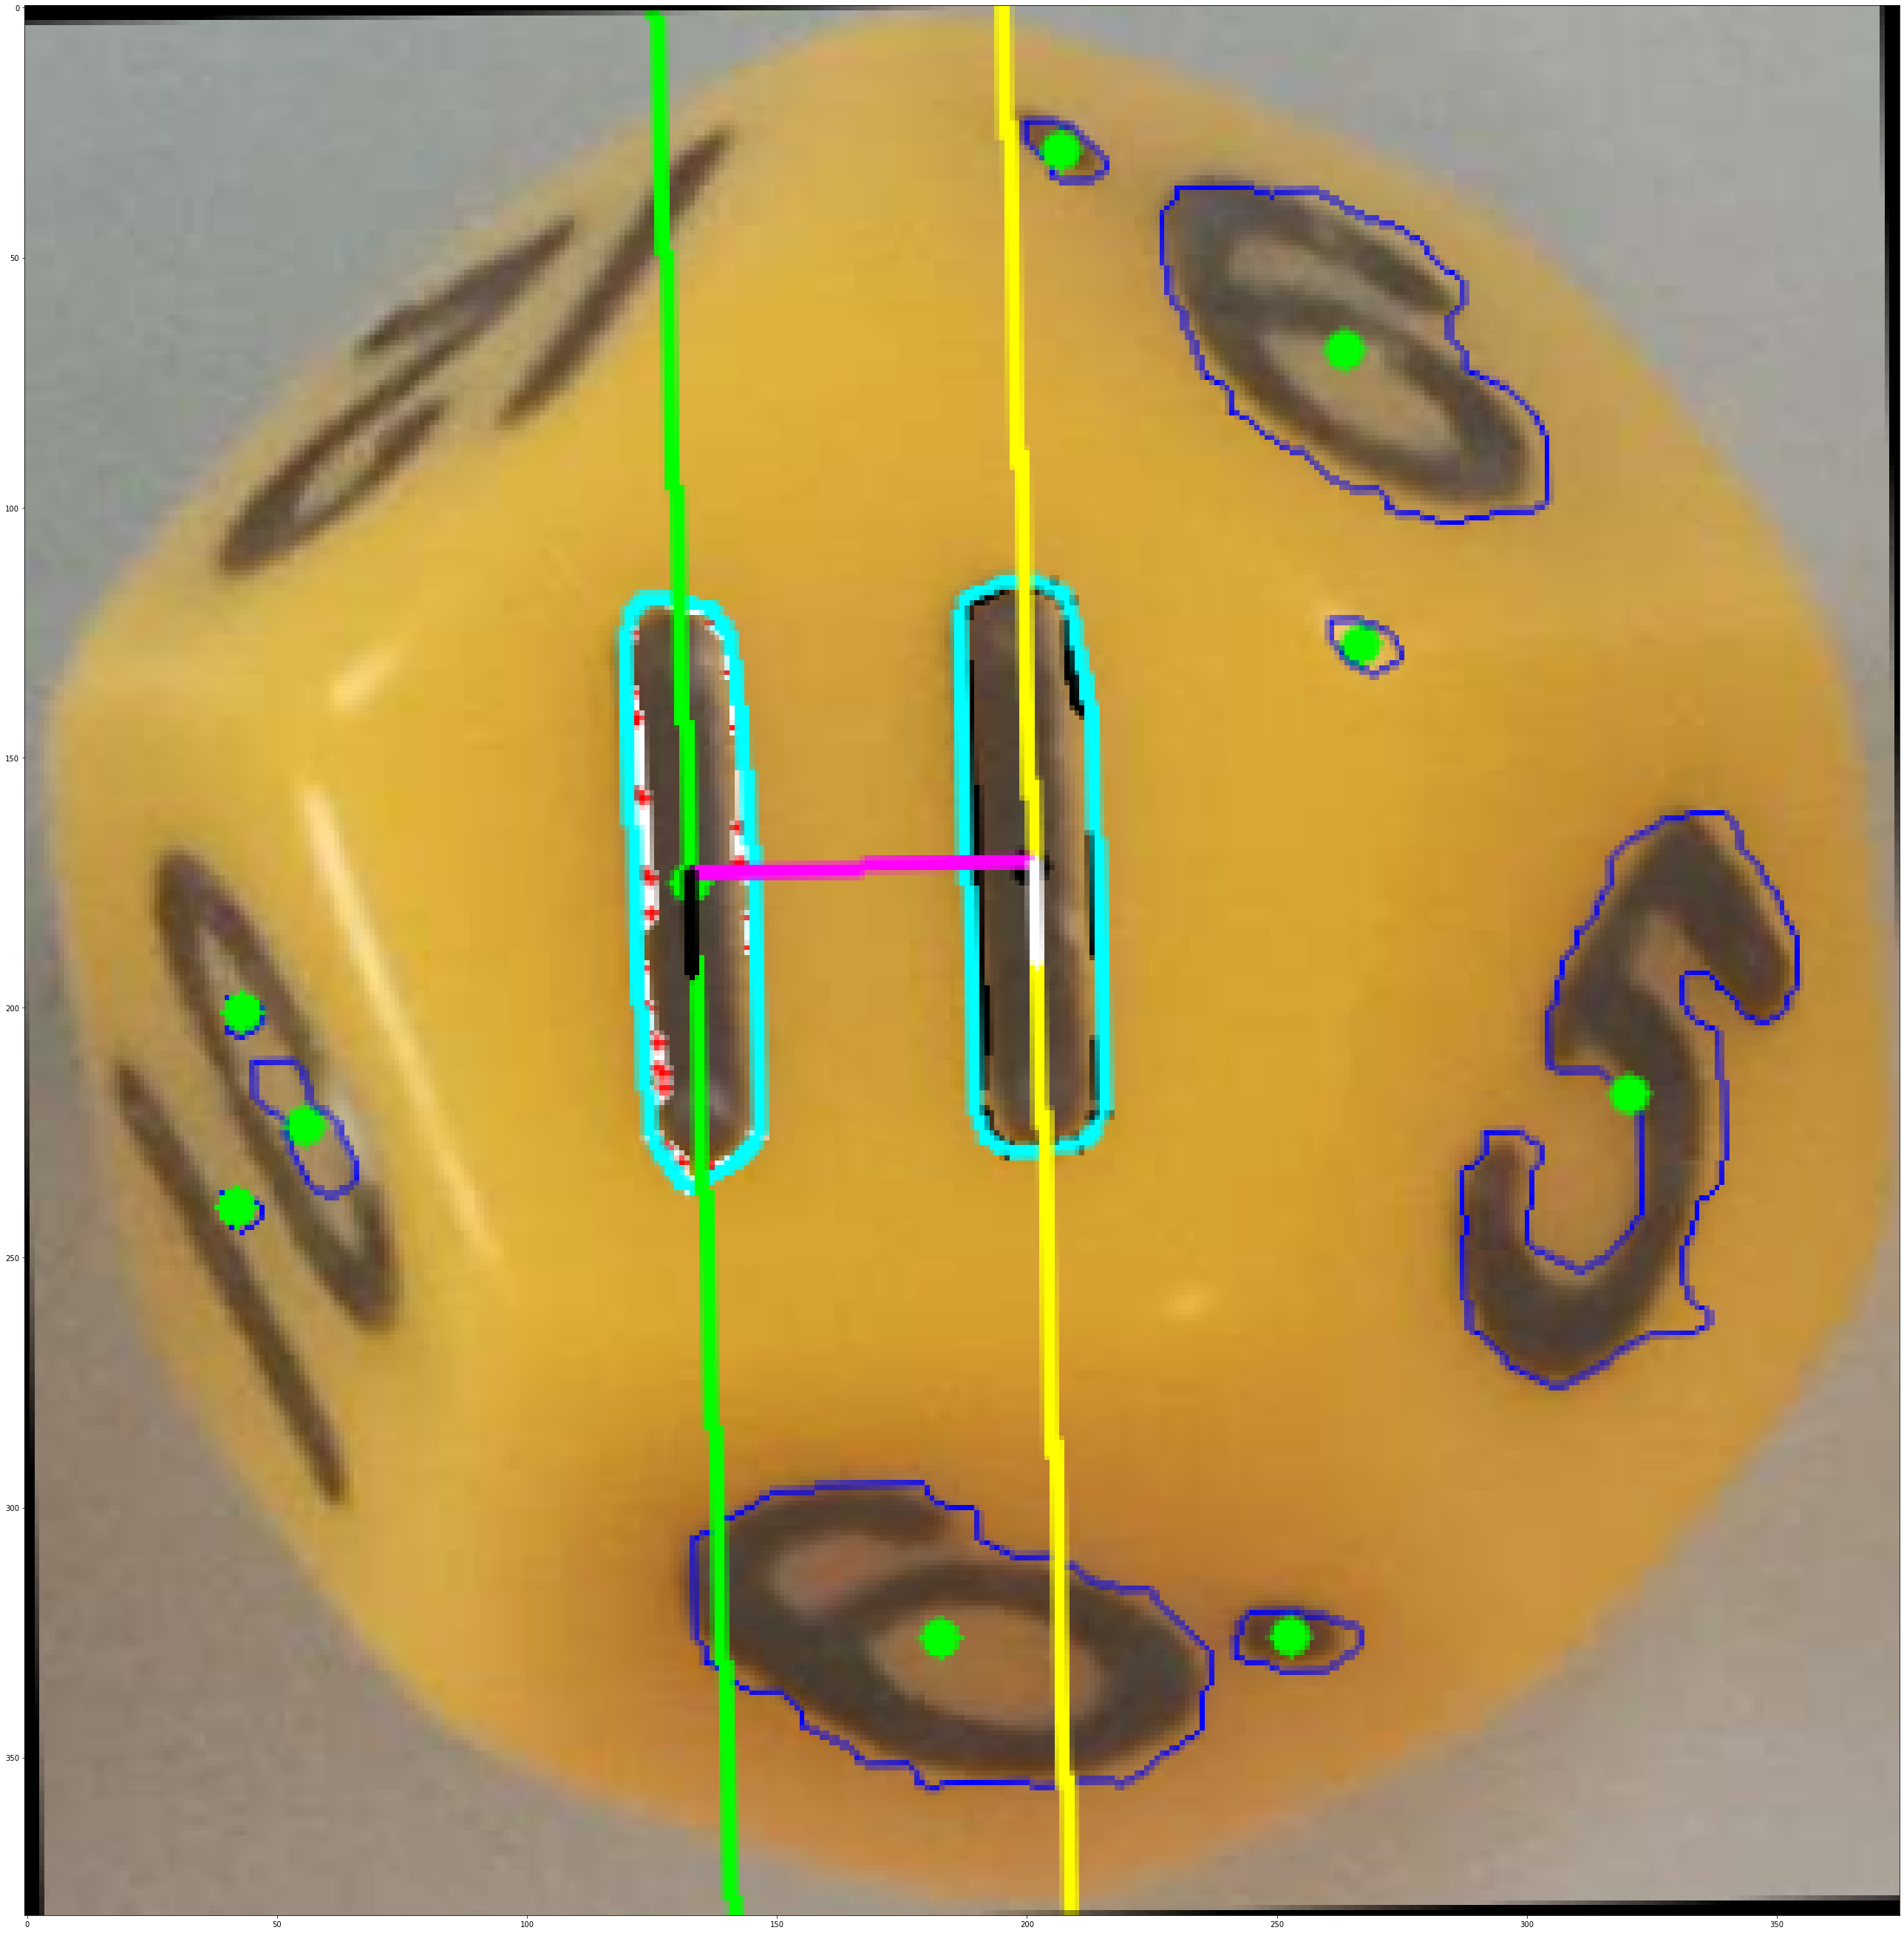

In [500]:
[vx1,vy1,x1,y1] = cv2.fitLine(bestContur, cv2.DIST_L2,0,0.01,0.01)
angleToRoateBy = angleBettween(vx1,vy1,0,1)
angleToRoateBy = angleToRoateBy%math.pi
print(angleToRoateBy*57.29578)
imgRotate(dieRawTemp,(angleToRoateBy*57.29578))

((201.62887573242188, 171.970458984375), (114.03775024414062, 26.335412979125977), 89.35625457763672)
((133.88912963867188, 175.90200805664062), (118.10774230957031, 24.286893844604492), 88.9583740234375)
0.39788055419921875
(201, 171)
(114, 26)
(133, 175)
(118, 24)
(133, 175)
(118, 24)


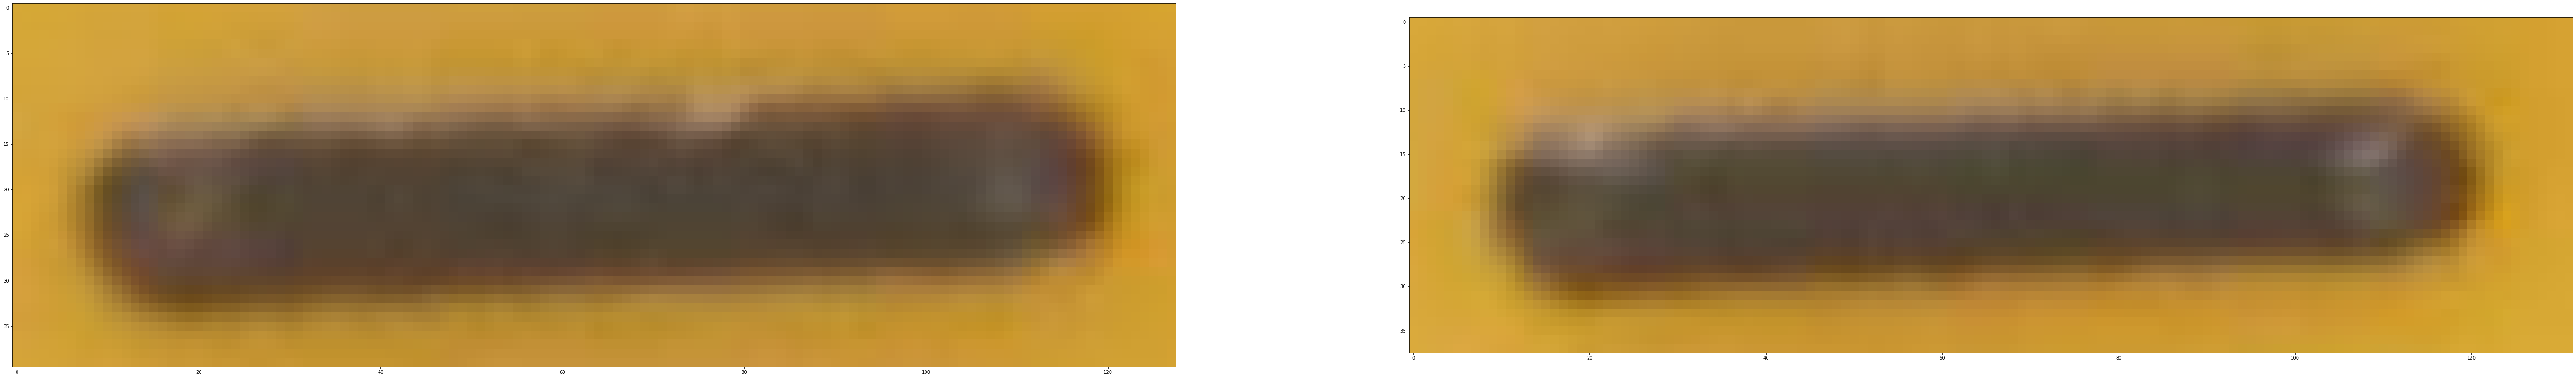

In [496]:
MinRectClosetContur = cv2.minAreaRect(closestContur)
MinRectSecondClosestContur =  cv2.minAreaRect(contoursWithoutDice[secondClosestCordIndex])
if debug == 1:
    print(MinRectClosetContur)
    print(MinRectSecondClosestContur)
angleDifreance = MinRectClosetContur[2]-MinRectSecondClosestContur[2]
if debug == 1:
    print(angleDifreance)
output = []
output.append(getSubImage(MinRectClosetContur,dieRaw))
if angleDifreance < 5 and angleDifreance > -5:
    output.append(getSubImage(MinRectSecondClosestContur,dieRaw))
output.append(getSubImage(MinRectSecondClosestContur,dieRaw))

if debug == 1:
    plt.figure(figsize=(100,100))
    plt.subplot(1,2,1),plt.imshow(output[0])
    plt.subplot(1,2,2),plt.imshow(output[1])

In [497]:
print(MinRectClosetContur[2])
print(MinRectSecondClosestContur[2])

89.35625457763672
88.9583740234375


In [523]:
[[[1,2],[3,4]]][0][0]

[1, 2]

In [519]:
print(output[1])

[[[216 168  58]
  [216 168  58]
  [215 167  57]
  ...
  [213 161  49]
  [214 162  50]
  [214 162  50]]

 [[216 168  58]
  [215 167  57]
  [215 167  57]
  ...
  [213 161  49]
  [214 162  50]
  [214 162  50]]

 [[215 167  57]
  [215 167  57]
  [214 166  56]
  ...
  [213 161  49]
  [214 162  50]
  [214 162  50]]

 ...

 [[218 170  60]
  [217 169  60]
  [216 168  61]
  ...
  [216 169  53]
  [216 169  53]
  [216 169  53]]

 [[218 170  60]
  [217 169  61]
  [217 168  62]
  ...
  [217 170  54]
  [217 170  54]
  [217 170  54]]

 [[218 170  60]
  [217 170  61]
  [217 169  63]
  ...
  [217 170  54]
  [217 170  54]
  [217 170  54]]]
